# Implement of GTGenie on HMDD in 5-fold cross validation
1. 'parser' is used to assign different hyperparameters.
2. The cross validation is repeated for ten times. In each time, we use function 'sample' to split the dataset into train set and test set.
3. Train set and test set are fed to function 'train' which use the BFN to combine the graph features and text features captured by TRR and GAT to reconstruct the final molecule-disease associations matrix. 
4. Then the predicted scores returned by fuction 'train' are used to calculate AUC and AUPR.

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import argparse
from utils import sample
from train import train
from evaluation import *
from tfdeterminism import patch

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Training')
    parser.add_argument('--GPU', type=str, default='0')
    parser.add_argument('--epoch', type=int, default=500)
    parser.add_argument('--hid_units', type=int, default=256, help='number of neurons in GAT')
    parser.add_argument('--dense0', type=int, default=256, help='number of neurons in BFN')
    parser.add_argument('--dense1', type=int, default=128, help='number of neurons in BFN')
    parser.add_argument('--layers', type=int, default=4, help='number of layer aggregator in GAT')
    parser.add_argument('--lr', type=float, default=0.001)
    parser.add_argument('--attention_drop', type=float, default=0.1)
    parser.add_argument('--feedforward_drop', type=float, default=0.1)
    parser.add_argument('--dataset', type=str, default='HMDD')
    args = parser.parse_known_args()[0]

    patch()
    SEED = 1000
    tf.set_random_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.GPU

    dataset = args.dataset
    times = 10
    total_KFOLD_test_labels, total_FOLD_test_scores = [], []
    KFOLD_test_out_come = []
    for i in range(times):
        for fold in range(5):
            print("times: %d, fold: %d" % (int(i), int(fold)))
            train_arr = np.loadtxt(f'data/{dataset}/data_dir/{i}/{fold}/train_arr.txt')
            test_arr = np.loadtxt(f'data/{dataset}/data_dir/{i}/{fold}/test_arr.txt')
            train_arr = train_arr.astype(np.int64)
            test_arr = test_arr.astype(np.int64)
            test_labels, scores, test_out_come = train(args, train_arr, test_arr, dataset, i, fold)
            total_KFOLD_test_labels.append(test_labels)
            total_FOLD_test_scores.append(scores)
            KFOLD_test_out_come.append(test_out_come)

    print('Finish!')

TensorFlow version 1.15.5 has been patched using tfdeterminism version 0.3.0


times: 0, fold: 0
----- Archi. hyperparams -----
 dataset: HMDD
 epoch: 500
 lr: 0.001
 Graph units: [256]
 dense0: 256
 dense1: 128
 layers num: 4
 attention_drop:0.1
 feedforward_drop:0.1


/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.keras.layers.Conv1D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Epoch: 0001 | train_loss = 0.12843, train_auc = 0.61596, test_loss = 0.07028, test_auc = 0.59359, time = 2.20971
Epoch: 0010 | train_loss = 0.08530, train_auc = 0.88842, test_loss = 0.04919, test_auc = 0.83297, time = 0.05109
Epoch: 0020 | train_loss = 0.07379, train_auc = 0.92700, test_loss = 0.04358, test_auc = 0.86355, time = 0.04843
Epoch: 0030 | train_loss = 0.06932, train_auc = 0.93888, test_loss = 0.03626, test_auc = 0.93395, time = 0.04593
Epoch: 0040 | train_loss = 0.06431, train_auc = 0.94799, test_loss = 0.03777, test_auc = 0.91816, time = 0.04528
Epoch: 0050 | train_loss = 0.06301, train_auc = 0.95260, test_loss = 0.03380, test_auc = 0.94473, time = 0.04626
Epoch: 0060 | train_loss = 0.05

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15105, train_auc = 0.38808, test_loss = 0.06883, test_auc = 0.61535, time = 0.82570
Epoch: 0010 | train_loss = 0.08145, train_auc = 0.91189, test_loss = 0.04993, test_auc = 0.85235, time = 0.05191
Epoch: 0020 | train_loss = 0.07267, train_auc = 0.92742, test_loss = 0.04292, test_auc = 0.87160, time = 0.05098
Epoch: 0030 | train_loss = 0.06509, train_auc = 0.94756, test_loss = 0.03754, test_auc = 0.91463, time = 0.04853
Epoch: 0040 | train_loss = 0.06539, train_auc = 0.94979, test_loss = 0.03940, test_auc = 0.90546, time = 0.04949
Epoch: 0050 | train_loss = 0.06046, train_auc = 0.95712, test_loss = 0.03411, test_auc = 0.94299, time = 0.05005
Epoch: 0060 | train_loss = 0.05817, train_auc = 0.96017, test_loss = 0.03229, test_auc = 0.95074, time = 0.04887
Epoch: 0070 | train_loss = 0.05401, train_auc = 0.96628, test_loss = 0.03290, test_auc = 0.95204, time = 0.04863
Epoch: 0080 | train_loss = 0.05314, train_auc = 0.96744, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14498, train_auc = 0.42268, test_loss = 0.06834, test_auc = 0.62195, time = 0.83600
Epoch: 0010 | train_loss = 0.08402, train_auc = 0.89873, test_loss = 0.05231, test_auc = 0.84091, time = 0.04993
Epoch: 0020 | train_loss = 0.07568, train_auc = 0.92438, test_loss = 0.04377, test_auc = 0.88485, time = 0.04996
Epoch: 0030 | train_loss = 0.06729, train_auc = 0.94528, test_loss = 0.03816, test_auc = 0.92720, time = 0.04890
Epoch: 0040 | train_loss = 0.06352, train_auc = 0.95256, test_loss = 0.03888, test_auc = 0.92186, time = 0.04865
Epoch: 0050 | train_loss = 0.06107, train_auc = 0.95627, test_loss = 0.03359, test_auc = 0.94413, time = 0.04804
Epoch: 0060 | train_loss = 0.05865, train_auc = 0.96014, test_loss = 0.03904, test_auc = 0.93611, time = 0.05452
Epoch: 0070 | train_loss = 0.05685, train_auc = 0.96318, test_loss = 0.03295, test_auc = 0.94867, time = 0.04839
Epoch: 0080 | train_loss = 0.06081, train_auc = 0.95874, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13412, train_auc = 0.55812, test_loss = 0.07234, test_auc = 0.57166, time = 0.79315
Epoch: 0010 | train_loss = 0.08204, train_auc = 0.90700, test_loss = 0.04666, test_auc = 0.84204, time = 0.05538
Epoch: 0020 | train_loss = 0.07392, train_auc = 0.92483, test_loss = 0.04313, test_auc = 0.87568, time = 0.04944
Epoch: 0030 | train_loss = 0.06619, train_auc = 0.94445, test_loss = 0.03994, test_auc = 0.91391, time = 0.04850
Epoch: 0040 | train_loss = 0.06230, train_auc = 0.95186, test_loss = 0.03754, test_auc = 0.92276, time = 0.04758
Epoch: 0050 | train_loss = 0.06208, train_auc = 0.95415, test_loss = 0.03366, test_auc = 0.94515, time = 0.06134
Epoch: 0060 | train_loss = 0.05563, train_auc = 0.96428, test_loss = 0.03250, test_auc = 0.94815, time = 0.04769
Epoch: 0070 | train_loss = 0.05589, train_auc = 0.96421, test_loss = 0.03935, test_auc = 0.93917, time = 0.04764
Epoch: 0080 | train_loss = 0.05699, train_auc = 0.96294, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13665, train_auc = 0.51104, test_loss = 0.07337, test_auc = 0.54314, time = 0.82001
Epoch: 0010 | train_loss = 0.08263, train_auc = 0.90189, test_loss = 0.05447, test_auc = 0.85265, time = 0.05187
Epoch: 0020 | train_loss = 0.07608, train_auc = 0.91387, test_loss = 0.04063, test_auc = 0.90896, time = 0.05084
Epoch: 0030 | train_loss = 0.06859, train_auc = 0.94358, test_loss = 0.03812, test_auc = 0.91956, time = 0.04645
Epoch: 0040 | train_loss = 0.06303, train_auc = 0.95189, test_loss = 0.03642, test_auc = 0.93449, time = 0.04641
Epoch: 0050 | train_loss = 0.06196, train_auc = 0.95397, test_loss = 0.03567, test_auc = 0.93924, time = 0.04595
Epoch: 0060 | train_loss = 0.05857, train_auc = 0.96075, test_loss = 0.03600, test_auc = 0.94576, time = 0.04533
Epoch: 0070 | train_loss = 0.05865, train_auc = 0.96385, test_loss = 0.03409, test_auc = 0.94382, time = 0.04542
Epoch: 0080 | train_loss = 0.05501, train_auc = 0.96665, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14024, train_auc = 0.49346, test_loss = 0.07432, test_auc = 0.53512, time = 0.79171
Epoch: 0010 | train_loss = 0.08799, train_auc = 0.88260, test_loss = 0.05531, test_auc = 0.79109, time = 0.05155
Epoch: 0020 | train_loss = 0.07595, train_auc = 0.91710, test_loss = 0.04246, test_auc = 0.89581, time = 0.05007
Epoch: 0030 | train_loss = 0.06877, train_auc = 0.93970, test_loss = 0.04035, test_auc = 0.91054, time = 0.05164
Epoch: 0040 | train_loss = 0.06469, train_auc = 0.95004, test_loss = 0.04169, test_auc = 0.92785, time = 0.04846
Epoch: 0050 | train_loss = 0.06189, train_auc = 0.95472, test_loss = 0.03616, test_auc = 0.93479, time = 0.04909
Epoch: 0060 | train_loss = 0.05730, train_auc = 0.96089, test_loss = 0.03671, test_auc = 0.94121, time = 0.05020
Epoch: 0070 | train_loss = 0.05708, train_auc = 0.96289, test_loss = 0.03547, test_auc = 0.94594, time = 0.05474
Epoch: 0080 | train_loss = 0.05442, train_auc = 0.96627, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14893, train_auc = 0.39394, test_loss = 0.07183, test_auc = 0.56453, time = 0.79002
Epoch: 0010 | train_loss = 0.07980, train_auc = 0.91464, test_loss = 0.04452, test_auc = 0.86221, time = 0.05063
Epoch: 0020 | train_loss = 0.07543, train_auc = 0.93423, test_loss = 0.04037, test_auc = 0.90654, time = 0.04731
Epoch: 0030 | train_loss = 0.06616, train_auc = 0.94358, test_loss = 0.04132, test_auc = 0.90034, time = 0.04490
Epoch: 0040 | train_loss = 0.06204, train_auc = 0.95171, test_loss = 0.03532, test_auc = 0.93874, time = 0.04476
Epoch: 0050 | train_loss = 0.06149, train_auc = 0.95673, test_loss = 0.03852, test_auc = 0.93663, time = 0.04448
Epoch: 0060 | train_loss = 0.05722, train_auc = 0.96086, test_loss = 0.03595, test_auc = 0.92960, time = 0.04329
Epoch: 0070 | train_loss = 0.05703, train_auc = 0.96411, test_loss = 0.03416, test_auc = 0.94526, time = 0.04380
Epoch: 0080 | train_loss = 0.05408, train_auc = 0.96637, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13901, train_auc = 0.48247, test_loss = 0.06792, test_auc = 0.61488, time = 0.82265
Epoch: 0010 | train_loss = 0.08717, train_auc = 0.89932, test_loss = 0.05623, test_auc = 0.80412, time = 0.04843
Epoch: 0020 | train_loss = 0.07753, train_auc = 0.91969, test_loss = 0.04211, test_auc = 0.90005, time = 0.04776
Epoch: 0030 | train_loss = 0.07105, train_auc = 0.93735, test_loss = 0.03858, test_auc = 0.92293, time = 0.04633
Epoch: 0040 | train_loss = 0.06698, train_auc = 0.94406, test_loss = 0.03429, test_auc = 0.94035, time = 0.04569
Epoch: 0050 | train_loss = 0.06264, train_auc = 0.95309, test_loss = 0.03481, test_auc = 0.94083, time = 0.04631
Epoch: 0060 | train_loss = 0.05983, train_auc = 0.96014, test_loss = 0.03142, test_auc = 0.95288, time = 0.04606
Epoch: 0070 | train_loss = 0.05709, train_auc = 0.96298, test_loss = 0.03315, test_auc = 0.94734, time = 0.04488
Epoch: 0080 | train_loss = 0.05493, train_auc = 0.96620, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13677, train_auc = 0.53056, test_loss = 0.07405, test_auc = 0.52337, time = 0.83936
Epoch: 0010 | train_loss = 0.08355, train_auc = 0.90531, test_loss = 0.05253, test_auc = 0.82156, time = 0.05277
Epoch: 0020 | train_loss = 0.07272, train_auc = 0.92855, test_loss = 0.04116, test_auc = 0.88573, time = 0.04961
Epoch: 0030 | train_loss = 0.06716, train_auc = 0.94324, test_loss = 0.03821, test_auc = 0.91520, time = 0.04883
Epoch: 0040 | train_loss = 0.06445, train_auc = 0.95056, test_loss = 0.03661, test_auc = 0.93498, time = 0.04903
Epoch: 0050 | train_loss = 0.06314, train_auc = 0.95431, test_loss = 0.03445, test_auc = 0.94544, time = 0.04969
Epoch: 0060 | train_loss = 0.05831, train_auc = 0.96139, test_loss = 0.03249, test_auc = 0.94959, time = 0.04810
Epoch: 0070 | train_loss = 0.05542, train_auc = 0.96615, test_loss = 0.03289, test_auc = 0.95185, time = 0.04715
Epoch: 0080 | train_loss = 0.05498, train_auc = 0.96719, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14166, train_auc = 0.51011, test_loss = 0.06892, test_auc = 0.60263, time = 0.82321
Epoch: 0010 | train_loss = 0.08854, train_auc = 0.89078, test_loss = 0.05521, test_auc = 0.80183, time = 0.04944
Epoch: 0020 | train_loss = 0.07900, train_auc = 0.91089, test_loss = 0.04247, test_auc = 0.88582, time = 0.04973
Epoch: 0030 | train_loss = 0.07222, train_auc = 0.93046, test_loss = 0.04356, test_auc = 0.87253, time = 0.04798
Epoch: 0040 | train_loss = 0.06695, train_auc = 0.94466, test_loss = 0.04022, test_auc = 0.91299, time = 0.04945
Epoch: 0050 | train_loss = 0.06416, train_auc = 0.94947, test_loss = 0.03695, test_auc = 0.93459, time = 0.05370
Epoch: 0060 | train_loss = 0.06099, train_auc = 0.95835, test_loss = 0.03859, test_auc = 0.92840, time = 0.04697
Epoch: 0070 | train_loss = 0.05887, train_auc = 0.96049, test_loss = 0.03814, test_auc = 0.93448, time = 0.04632
Epoch: 0080 | train_loss = 0.05854, train_auc = 0.96235, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15792, train_auc = 0.32091, test_loss = 0.07291, test_auc = 0.53849, time = 0.79730
Epoch: 0010 | train_loss = 0.08189, train_auc = 0.91071, test_loss = 0.04764, test_auc = 0.87035, time = 0.05163
Epoch: 0020 | train_loss = 0.07251, train_auc = 0.93048, test_loss = 0.04207, test_auc = 0.88975, time = 0.04804
Epoch: 0030 | train_loss = 0.06852, train_auc = 0.93981, test_loss = 0.03815, test_auc = 0.91171, time = 0.04734
Epoch: 0040 | train_loss = 0.06827, train_auc = 0.94365, test_loss = 0.03481, test_auc = 0.93841, time = 0.04920
Epoch: 0050 | train_loss = 0.06223, train_auc = 0.95241, test_loss = 0.03319, test_auc = 0.94638, time = 0.05013
Epoch: 0060 | train_loss = 0.05965, train_auc = 0.95802, test_loss = 0.03321, test_auc = 0.94568, time = 0.06236
Epoch: 0070 | train_loss = 0.05882, train_auc = 0.96094, test_loss = 0.03756, test_auc = 0.94097, time = 0.04673
Epoch: 0080 | train_loss = 0.05596, train_auc = 0.96395, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15731, train_auc = 0.32117, test_loss = 0.08610, test_auc = 0.31291, time = 0.78590
Epoch: 0010 | train_loss = 0.08326, train_auc = 0.90898, test_loss = 0.04812, test_auc = 0.83637, time = 0.05104
Epoch: 0020 | train_loss = 0.07469, train_auc = 0.92745, test_loss = 0.04330, test_auc = 0.89138, time = 0.04863
Epoch: 0030 | train_loss = 0.06702, train_auc = 0.94295, test_loss = 0.03850, test_auc = 0.91984, time = 0.04849
Epoch: 0040 | train_loss = 0.06751, train_auc = 0.94686, test_loss = 0.03827, test_auc = 0.92376, time = 0.04728
Epoch: 0050 | train_loss = 0.06133, train_auc = 0.95456, test_loss = 0.03631, test_auc = 0.93630, time = 0.05422
Epoch: 0060 | train_loss = 0.05897, train_auc = 0.95869, test_loss = 0.03322, test_auc = 0.94436, time = 0.04644
Epoch: 0070 | train_loss = 0.06110, train_auc = 0.95930, test_loss = 0.03596, test_auc = 0.94135, time = 0.04540
Epoch: 0080 | train_loss = 0.05940, train_auc = 0.96242, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13767, train_auc = 0.52887, test_loss = 0.07264, test_auc = 0.55630, time = 0.80195
Epoch: 0010 | train_loss = 0.08221, train_auc = 0.89680, test_loss = 0.05335, test_auc = 0.82699, time = 0.04958
Epoch: 0020 | train_loss = 0.07539, train_auc = 0.91817, test_loss = 0.03989, test_auc = 0.91336, time = 0.05001
Epoch: 0030 | train_loss = 0.06760, train_auc = 0.93973, test_loss = 0.03770, test_auc = 0.92865, time = 0.04952
Epoch: 0040 | train_loss = 0.06299, train_auc = 0.94887, test_loss = 0.03953, test_auc = 0.91975, time = 0.04995
Epoch: 0050 | train_loss = 0.06201, train_auc = 0.95067, test_loss = 0.03488, test_auc = 0.94044, time = 0.04943
Epoch: 0060 | train_loss = 0.06106, train_auc = 0.95702, test_loss = 0.03487, test_auc = 0.94095, time = 0.04778
Epoch: 0070 | train_loss = 0.05940, train_auc = 0.95797, test_loss = 0.03599, test_auc = 0.94389, time = 0.04817
Epoch: 0080 | train_loss = 0.06324, train_auc = 0.95395, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13313, train_auc = 0.59918, test_loss = 0.09435, test_auc = 0.19957, time = 0.81843
Epoch: 0010 | train_loss = 0.08479, train_auc = 0.88914, test_loss = 0.05151, test_auc = 0.84684, time = 0.05149
Epoch: 0020 | train_loss = 0.07347, train_auc = 0.92945, test_loss = 0.04084, test_auc = 0.90120, time = 0.05017
Epoch: 0030 | train_loss = 0.06657, train_auc = 0.94642, test_loss = 0.03933, test_auc = 0.92248, time = 0.04924
Epoch: 0040 | train_loss = 0.06364, train_auc = 0.94692, test_loss = 0.03687, test_auc = 0.92751, time = 0.04795
Epoch: 0050 | train_loss = 0.06109, train_auc = 0.95529, test_loss = 0.03780, test_auc = 0.93529, time = 0.04846
Epoch: 0060 | train_loss = 0.06057, train_auc = 0.95695, test_loss = 0.03515, test_auc = 0.94729, time = 0.04821
Epoch: 0070 | train_loss = 0.05722, train_auc = 0.96141, test_loss = 0.03381, test_auc = 0.95000, time = 0.04757
Epoch: 0080 | train_loss = 0.05528, train_auc = 0.96484, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14522, train_auc = 0.45801, test_loss = 0.06995, test_auc = 0.59042, time = 0.81518
Epoch: 0010 | train_loss = 0.08648, train_auc = 0.88682, test_loss = 0.05063, test_auc = 0.83008, time = 0.05054
Epoch: 0020 | train_loss = 0.07628, train_auc = 0.92044, test_loss = 0.04287, test_auc = 0.88787, time = 0.05017
Epoch: 0030 | train_loss = 0.06774, train_auc = 0.94325, test_loss = 0.04094, test_auc = 0.90676, time = 0.04891
Epoch: 0040 | train_loss = 0.06373, train_auc = 0.95182, test_loss = 0.04083, test_auc = 0.91916, time = 0.04883
Epoch: 0050 | train_loss = 0.06683, train_auc = 0.94649, test_loss = 0.03615, test_auc = 0.93693, time = 0.04870
Epoch: 0060 | train_loss = 0.05858, train_auc = 0.95980, test_loss = 0.03660, test_auc = 0.93685, time = 0.04967
Epoch: 0070 | train_loss = 0.05523, train_auc = 0.96380, test_loss = 0.03553, test_auc = 0.94256, time = 0.05504
Epoch: 0080 | train_loss = 0.05210, train_auc = 0.96934, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13662, train_auc = 0.54196, test_loss = 0.07408, test_auc = 0.53195, time = 0.80322
Epoch: 0010 | train_loss = 0.08140, train_auc = 0.91378, test_loss = 0.04713, test_auc = 0.89411, time = 0.05321
Epoch: 0020 | train_loss = 0.07727, train_auc = 0.93106, test_loss = 0.03889, test_auc = 0.91671, time = 0.04894
Epoch: 0030 | train_loss = 0.07196, train_auc = 0.93345, test_loss = 0.04137, test_auc = 0.90123, time = 0.04851
Epoch: 0040 | train_loss = 0.06731, train_auc = 0.94271, test_loss = 0.03651, test_auc = 0.92964, time = 0.04912
Epoch: 0050 | train_loss = 0.06321, train_auc = 0.95346, test_loss = 0.03567, test_auc = 0.93926, time = 0.04841
Epoch: 0060 | train_loss = 0.06229, train_auc = 0.95582, test_loss = 0.03370, test_auc = 0.94552, time = 0.04847
Epoch: 0070 | train_loss = 0.05801, train_auc = 0.96118, test_loss = 0.03780, test_auc = 0.93349, time = 0.04790
Epoch: 0080 | train_loss = 0.05414, train_auc = 0.96625, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13937, train_auc = 0.49385, test_loss = 0.08969, test_auc = 0.29266, time = 0.79116
Epoch: 0010 | train_loss = 0.08046, train_auc = 0.91784, test_loss = 0.05581, test_auc = 0.87714, time = 0.04946
Epoch: 0020 | train_loss = 0.07106, train_auc = 0.93605, test_loss = 0.04343, test_auc = 0.86517, time = 0.04882
Epoch: 0030 | train_loss = 0.06439, train_auc = 0.94916, test_loss = 0.04069, test_auc = 0.88488, time = 0.04916
Epoch: 0040 | train_loss = 0.06279, train_auc = 0.95202, test_loss = 0.03878, test_auc = 0.92359, time = 0.04906
Epoch: 0050 | train_loss = 0.05952, train_auc = 0.95762, test_loss = 0.03709, test_auc = 0.92914, time = 0.04855
Epoch: 0060 | train_loss = 0.05651, train_auc = 0.96370, test_loss = 0.03407, test_auc = 0.94423, time = 0.04754
Epoch: 0070 | train_loss = 0.05424, train_auc = 0.96709, test_loss = 0.03459, test_auc = 0.94687, time = 0.04918
Epoch: 0080 | train_loss = 0.05250, train_auc = 0.96970, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13245, train_auc = 0.55852, test_loss = 0.07428, test_auc = 0.53176, time = 0.81776
Epoch: 0010 | train_loss = 0.08637, train_auc = 0.90106, test_loss = 0.06114, test_auc = 0.86966, time = 0.05243
Epoch: 0020 | train_loss = 0.07485, train_auc = 0.92871, test_loss = 0.04292, test_auc = 0.87956, time = 0.05132
Epoch: 0030 | train_loss = 0.07128, train_auc = 0.93679, test_loss = 0.03682, test_auc = 0.93444, time = 0.04866
Epoch: 0040 | train_loss = 0.06623, train_auc = 0.94671, test_loss = 0.03620, test_auc = 0.94070, time = 0.04920
Epoch: 0050 | train_loss = 0.06126, train_auc = 0.95624, test_loss = 0.03556, test_auc = 0.94514, time = 0.04887
Epoch: 0060 | train_loss = 0.06042, train_auc = 0.95870, test_loss = 0.03282, test_auc = 0.94970, time = 0.04988
Epoch: 0070 | train_loss = 0.05602, train_auc = 0.96567, test_loss = 0.03238, test_auc = 0.95069, time = 0.04809
Epoch: 0080 | train_loss = 0.05505, train_auc = 0.96757, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14550, train_auc = 0.42036, test_loss = 0.07402, test_auc = 0.54685, time = 0.80894
Epoch: 0010 | train_loss = 0.08254, train_auc = 0.90197, test_loss = 0.04777, test_auc = 0.88307, time = 0.05150
Epoch: 0020 | train_loss = 0.07454, train_auc = 0.92466, test_loss = 0.04187, test_auc = 0.89102, time = 0.04828
Epoch: 0030 | train_loss = 0.06546, train_auc = 0.94690, test_loss = 0.04142, test_auc = 0.90720, time = 0.04814
Epoch: 0040 | train_loss = 0.06206, train_auc = 0.95363, test_loss = 0.03608, test_auc = 0.94036, time = 0.04680
Epoch: 0050 | train_loss = 0.06196, train_auc = 0.95368, test_loss = 0.03386, test_auc = 0.94668, time = 0.04666
Epoch: 0060 | train_loss = 0.05883, train_auc = 0.95827, test_loss = 0.03383, test_auc = 0.94709, time = 0.04657
Epoch: 0070 | train_loss = 0.05549, train_auc = 0.96403, test_loss = 0.03323, test_auc = 0.95088, time = 0.04643
Epoch: 0080 | train_loss = 0.05281, train_auc = 0.96896, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15385, train_auc = 0.34561, test_loss = 0.07306, test_auc = 0.55915, time = 0.80817
Epoch: 0010 | train_loss = 0.08442, train_auc = 0.89192, test_loss = 0.04806, test_auc = 0.84587, time = 0.05127
Epoch: 0020 | train_loss = 0.07455, train_auc = 0.92453, test_loss = 0.04392, test_auc = 0.88392, time = 0.04896
Epoch: 0030 | train_loss = 0.07079, train_auc = 0.93530, test_loss = 0.04052, test_auc = 0.90090, time = 0.04907
Epoch: 0040 | train_loss = 0.06680, train_auc = 0.94760, test_loss = 0.03577, test_auc = 0.93565, time = 0.04824
Epoch: 0050 | train_loss = 0.06462, train_auc = 0.95186, test_loss = 0.03590, test_auc = 0.94613, time = 0.04675
Epoch: 0060 | train_loss = 0.06302, train_auc = 0.95687, test_loss = 0.03354, test_auc = 0.95108, time = 0.04670
Epoch: 0070 | train_loss = 0.05654, train_auc = 0.96247, test_loss = 0.03442, test_auc = 0.94271, time = 0.04647
Epoch: 0080 | train_loss = 0.05563, train_auc = 0.96494, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14594, train_auc = 0.42623, test_loss = 0.07460, test_auc = 0.52404, time = 0.80984
Epoch: 0010 | train_loss = 0.07836, train_auc = 0.92302, test_loss = 0.04429, test_auc = 0.84443, time = 0.04963
Epoch: 0020 | train_loss = 0.07038, train_auc = 0.93882, test_loss = 0.04196, test_auc = 0.89339, time = 0.04883
Epoch: 0030 | train_loss = 0.06816, train_auc = 0.94250, test_loss = 0.03990, test_auc = 0.91048, time = 0.04847
Epoch: 0040 | train_loss = 0.06332, train_auc = 0.95346, test_loss = 0.03604, test_auc = 0.93792, time = 0.04704
Epoch: 0050 | train_loss = 0.06037, train_auc = 0.95803, test_loss = 0.03485, test_auc = 0.94633, time = 0.04702
Epoch: 0060 | train_loss = 0.06321, train_auc = 0.95889, test_loss = 0.03370, test_auc = 0.94898, time = 0.04762
Epoch: 0070 | train_loss = 0.05483, train_auc = 0.96610, test_loss = 0.03292, test_auc = 0.94999, time = 0.04699
Epoch: 0080 | train_loss = 0.05162, train_auc = 0.97090, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15449, train_auc = 0.35049, test_loss = 0.07410, test_auc = 0.52364, time = 0.82376
Epoch: 0010 | train_loss = 0.08262, train_auc = 0.90556, test_loss = 0.04882, test_auc = 0.87305, time = 0.05037
Epoch: 0020 | train_loss = 0.07116, train_auc = 0.93422, test_loss = 0.04233, test_auc = 0.90104, time = 0.04936
Epoch: 0030 | train_loss = 0.06553, train_auc = 0.94936, test_loss = 0.03716, test_auc = 0.93124, time = 0.04784
Epoch: 0040 | train_loss = 0.06486, train_auc = 0.95296, test_loss = 0.03967, test_auc = 0.92996, time = 0.04861
Epoch: 0050 | train_loss = 0.05947, train_auc = 0.96003, test_loss = 0.03636, test_auc = 0.93601, time = 0.04661
Epoch: 0060 | train_loss = 0.05792, train_auc = 0.96327, test_loss = 0.03426, test_auc = 0.94586, time = 0.04650
Epoch: 0070 | train_loss = 0.05502, train_auc = 0.96679, test_loss = 0.03487, test_auc = 0.94173, time = 0.04636
Epoch: 0080 | train_loss = 0.05371, train_auc = 0.96919, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15303, train_auc = 0.38505, test_loss = 0.07387, test_auc = 0.54261, time = 0.82432
Epoch: 0010 | train_loss = 0.08462, train_auc = 0.90062, test_loss = 0.05458, test_auc = 0.84084, time = 0.05087
Epoch: 0020 | train_loss = 0.07759, train_auc = 0.91977, test_loss = 0.04321, test_auc = 0.88591, time = 0.04685
Epoch: 0030 | train_loss = 0.07108, train_auc = 0.93382, test_loss = 0.03925, test_auc = 0.91803, time = 0.04730
Epoch: 0040 | train_loss = 0.06425, train_auc = 0.94985, test_loss = 0.03821, test_auc = 0.93787, time = 0.04636
Epoch: 0050 | train_loss = 0.06978, train_auc = 0.94353, test_loss = 0.03455, test_auc = 0.95052, time = 0.04467
Epoch: 0060 | train_loss = 0.06186, train_auc = 0.95406, test_loss = 0.03488, test_auc = 0.94952, time = 0.04471
Epoch: 0070 | train_loss = 0.05818, train_auc = 0.96223, test_loss = 0.03582, test_auc = 0.95133, time = 0.04407
Epoch: 0080 | train_loss = 0.05381, train_auc = 0.96617, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15697, train_auc = 0.32966, test_loss = 0.07293, test_auc = 0.55062, time = 0.81924
Epoch: 0010 | train_loss = 0.08439, train_auc = 0.90861, test_loss = 0.05113, test_auc = 0.85988, time = 0.05703
Epoch: 0020 | train_loss = 0.07152, train_auc = 0.93414, test_loss = 0.03996, test_auc = 0.90629, time = 0.05151
Epoch: 0030 | train_loss = 0.06834, train_auc = 0.94134, test_loss = 0.03679, test_auc = 0.92685, time = 0.04914
Epoch: 0040 | train_loss = 0.06530, train_auc = 0.95365, test_loss = 0.03542, test_auc = 0.93282, time = 0.04834
Epoch: 0050 | train_loss = 0.06071, train_auc = 0.95928, test_loss = 0.03702, test_auc = 0.93658, time = 0.04882
Epoch: 0060 | train_loss = 0.06287, train_auc = 0.95179, test_loss = 0.03482, test_auc = 0.93502, time = 0.04834
Epoch: 0070 | train_loss = 0.05894, train_auc = 0.96334, test_loss = 0.03324, test_auc = 0.94579, time = 0.04807
Epoch: 0080 | train_loss = 0.05440, train_auc = 0.96882, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15327, train_auc = 0.36078, test_loss = 0.08617, test_auc = 0.31162, time = 0.80808
Epoch: 0010 | train_loss = 0.08167, train_auc = 0.90740, test_loss = 0.04130, test_auc = 0.89205, time = 0.05335
Epoch: 0020 | train_loss = 0.07416, train_auc = 0.93086, test_loss = 0.03979, test_auc = 0.91022, time = 0.04971
Epoch: 0030 | train_loss = 0.06715, train_auc = 0.94646, test_loss = 0.03710, test_auc = 0.93239, time = 0.04956
Epoch: 0040 | train_loss = 0.06328, train_auc = 0.95275, test_loss = 0.03453, test_auc = 0.94512, time = 0.04929
Epoch: 0050 | train_loss = 0.05990, train_auc = 0.95951, test_loss = 0.03390, test_auc = 0.94709, time = 0.04985
Epoch: 0060 | train_loss = 0.06026, train_auc = 0.96029, test_loss = 0.03220, test_auc = 0.95451, time = 0.04824
Epoch: 0070 | train_loss = 0.05590, train_auc = 0.96585, test_loss = 0.03327, test_auc = 0.95937, time = 0.04893
Epoch: 0080 | train_loss = 0.05617, train_auc = 0.96776, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.12893, train_auc = 0.62221, test_loss = 0.07415, test_auc = 0.53339, time = 0.85061
Epoch: 0010 | train_loss = 0.08099, train_auc = 0.91739, test_loss = 0.04743, test_auc = 0.86347, time = 0.05235
Epoch: 0020 | train_loss = 0.07057, train_auc = 0.93711, test_loss = 0.04044, test_auc = 0.90219, time = 0.05643
Epoch: 0030 | train_loss = 0.06651, train_auc = 0.94756, test_loss = 0.03816, test_auc = 0.90634, time = 0.04882
Epoch: 0040 | train_loss = 0.06444, train_auc = 0.95112, test_loss = 0.03494, test_auc = 0.93256, time = 0.04880
Epoch: 0050 | train_loss = 0.06015, train_auc = 0.95487, test_loss = 0.03355, test_auc = 0.94551, time = 0.04826
Epoch: 0060 | train_loss = 0.05653, train_auc = 0.96279, test_loss = 0.03543, test_auc = 0.92696, time = 0.04704
Epoch: 0070 | train_loss = 0.05482, train_auc = 0.96439, test_loss = 0.03245, test_auc = 0.95283, time = 0.04712
Epoch: 0080 | train_loss = 0.05245, train_auc = 0.96763, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14580, train_auc = 0.42774, test_loss = 0.07157, test_auc = 0.57136, time = 0.80218
Epoch: 0010 | train_loss = 0.08244, train_auc = 0.90250, test_loss = 0.05318, test_auc = 0.85760, time = 0.05091
Epoch: 0020 | train_loss = 0.07108, train_auc = 0.93273, test_loss = 0.04297, test_auc = 0.89216, time = 0.04800
Epoch: 0030 | train_loss = 0.06647, train_auc = 0.94640, test_loss = 0.03553, test_auc = 0.93524, time = 0.04765
Epoch: 0040 | train_loss = 0.06296, train_auc = 0.95126, test_loss = 0.03889, test_auc = 0.93145, time = 0.04779
Epoch: 0050 | train_loss = 0.06151, train_auc = 0.95767, test_loss = 0.03480, test_auc = 0.93963, time = 0.04670
Epoch: 0060 | train_loss = 0.05738, train_auc = 0.96217, test_loss = 0.03477, test_auc = 0.94016, time = 0.04584
Epoch: 0070 | train_loss = 0.05621, train_auc = 0.96292, test_loss = 0.03460, test_auc = 0.94398, time = 0.04658
Epoch: 0080 | train_loss = 0.05239, train_auc = 0.96808, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14097, train_auc = 0.51755, test_loss = 0.06844, test_auc = 0.62059, time = 0.80205
Epoch: 0010 | train_loss = 0.08290, train_auc = 0.90275, test_loss = 0.04562, test_auc = 0.85449, time = 0.04994
Epoch: 0020 | train_loss = 0.07424, train_auc = 0.93046, test_loss = 0.04346, test_auc = 0.87555, time = 0.04966
Epoch: 0030 | train_loss = 0.07160, train_auc = 0.92885, test_loss = 0.03944, test_auc = 0.90667, time = 0.04863
Epoch: 0040 | train_loss = 0.06580, train_auc = 0.94730, test_loss = 0.03635, test_auc = 0.93261, time = 0.04879
Epoch: 0050 | train_loss = 0.06209, train_auc = 0.95398, test_loss = 0.03989, test_auc = 0.91170, time = 0.04719
Epoch: 0060 | train_loss = 0.06208, train_auc = 0.95775, test_loss = 0.03750, test_auc = 0.94373, time = 0.04866
Epoch: 0070 | train_loss = 0.05922, train_auc = 0.95954, test_loss = 0.03343, test_auc = 0.94633, time = 0.04749
Epoch: 0080 | train_loss = 0.05729, train_auc = 0.96310, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14984, train_auc = 0.38552, test_loss = 0.07350, test_auc = 0.53919, time = 0.79528
Epoch: 0010 | train_loss = 0.08690, train_auc = 0.87114, test_loss = 0.05129, test_auc = 0.80946, time = 0.05148
Epoch: 0020 | train_loss = 0.07613, train_auc = 0.91986, test_loss = 0.04058, test_auc = 0.89889, time = 0.04823
Epoch: 0030 | train_loss = 0.06710, train_auc = 0.94444, test_loss = 0.04066, test_auc = 0.90666, time = 0.04752
Epoch: 0040 | train_loss = 0.06228, train_auc = 0.95239, test_loss = 0.03787, test_auc = 0.92402, time = 0.04805
Epoch: 0050 | train_loss = 0.05746, train_auc = 0.96137, test_loss = 0.03521, test_auc = 0.93353, time = 0.04828
Epoch: 0060 | train_loss = 0.05757, train_auc = 0.96292, test_loss = 0.04045, test_auc = 0.93012, time = 0.04912
Epoch: 0070 | train_loss = 0.05907, train_auc = 0.95937, test_loss = 0.03939, test_auc = 0.92956, time = 0.04812
Epoch: 0080 | train_loss = 0.05557, train_auc = 0.96472, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14514, train_auc = 0.45351, test_loss = 0.07365, test_auc = 0.53740, time = 0.80834
Epoch: 0010 | train_loss = 0.08373, train_auc = 0.89674, test_loss = 0.05877, test_auc = 0.78543, time = 0.05104
Epoch: 0020 | train_loss = 0.07481, train_auc = 0.92707, test_loss = 0.03881, test_auc = 0.91470, time = 0.05009
Epoch: 0030 | train_loss = 0.06761, train_auc = 0.94234, test_loss = 0.03623, test_auc = 0.93399, time = 0.04797
Epoch: 0040 | train_loss = 0.06576, train_auc = 0.94811, test_loss = 0.03568, test_auc = 0.93810, time = 0.04781
Epoch: 0050 | train_loss = 0.06435, train_auc = 0.95130, test_loss = 0.03272, test_auc = 0.95087, time = 0.04809
Epoch: 0060 | train_loss = 0.05953, train_auc = 0.95730, test_loss = 0.03462, test_auc = 0.95193, time = 0.04790
Epoch: 0070 | train_loss = 0.05739, train_auc = 0.96036, test_loss = 0.03472, test_auc = 0.94982, time = 0.04693
Epoch: 0080 | train_loss = 0.05594, train_auc = 0.96244, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13131, train_auc = 0.57555, test_loss = 0.07421, test_auc = 0.52176, time = 0.80284
Epoch: 0010 | train_loss = 0.08110, train_auc = 0.90999, test_loss = 0.05998, test_auc = 0.79229, time = 0.05029
Epoch: 0020 | train_loss = 0.07137, train_auc = 0.93478, test_loss = 0.04240, test_auc = 0.88032, time = 0.05089
Epoch: 0030 | train_loss = 0.06657, train_auc = 0.94482, test_loss = 0.03770, test_auc = 0.92697, time = 0.04842
Epoch: 0040 | train_loss = 0.06361, train_auc = 0.95427, test_loss = 0.03497, test_auc = 0.93676, time = 0.04869
Epoch: 0050 | train_loss = 0.06169, train_auc = 0.95355, test_loss = 0.03689, test_auc = 0.93508, time = 0.04828
Epoch: 0060 | train_loss = 0.05815, train_auc = 0.96040, test_loss = 0.03715, test_auc = 0.93674, time = 0.05118
Epoch: 0070 | train_loss = 0.05529, train_auc = 0.96342, test_loss = 0.03351, test_auc = 0.94655, time = 0.05219
Epoch: 0080 | train_loss = 0.05483, train_auc = 0.96698, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14547, train_auc = 0.42461, test_loss = 0.07317, test_auc = 0.54380, time = 0.80875
Epoch: 0010 | train_loss = 0.08133, train_auc = 0.90520, test_loss = 0.05123, test_auc = 0.81432, time = 0.04875
Epoch: 0020 | train_loss = 0.07206, train_auc = 0.93737, test_loss = 0.04060, test_auc = 0.90491, time = 0.04809
Epoch: 0030 | train_loss = 0.06481, train_auc = 0.94668, test_loss = 0.04023, test_auc = 0.91171, time = 0.04815
Epoch: 0040 | train_loss = 0.06232, train_auc = 0.95376, test_loss = 0.03544, test_auc = 0.93899, time = 0.04585
Epoch: 0050 | train_loss = 0.06112, train_auc = 0.95524, test_loss = 0.03441, test_auc = 0.94400, time = 0.04606
Epoch: 0060 | train_loss = 0.05739, train_auc = 0.96196, test_loss = 0.03457, test_auc = 0.94529, time = 0.04668
Epoch: 0070 | train_loss = 0.05459, train_auc = 0.96558, test_loss = 0.03329, test_auc = 0.95081, time = 0.04528
Epoch: 0080 | train_loss = 0.05644, train_auc = 0.96228, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13624, train_auc = 0.52093, test_loss = 0.07280, test_auc = 0.55932, time = 0.81968
Epoch: 0010 | train_loss = 0.08319, train_auc = 0.90454, test_loss = 0.05027, test_auc = 0.82649, time = 0.05035
Epoch: 0020 | train_loss = 0.07241, train_auc = 0.93173, test_loss = 0.04231, test_auc = 0.88326, time = 0.04750
Epoch: 0030 | train_loss = 0.06592, train_auc = 0.94396, test_loss = 0.03924, test_auc = 0.90907, time = 0.04597
Epoch: 0040 | train_loss = 0.06222, train_auc = 0.95099, test_loss = 0.03692, test_auc = 0.92886, time = 0.04756
Epoch: 0050 | train_loss = 0.07628, train_auc = 0.93212, test_loss = 0.03517, test_auc = 0.94015, time = 0.04669
Epoch: 0060 | train_loss = 0.05846, train_auc = 0.95715, test_loss = 0.03511, test_auc = 0.93563, time = 0.04563
Epoch: 0070 | train_loss = 0.05592, train_auc = 0.96200, test_loss = 0.03928, test_auc = 0.92728, time = 0.04539
Epoch: 0080 | train_loss = 0.05399, train_auc = 0.96474, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13678, train_auc = 0.51851, test_loss = 0.06532, test_auc = 0.64942, time = 0.81334
Epoch: 0010 | train_loss = 0.08426, train_auc = 0.89874, test_loss = 0.04743, test_auc = 0.84386, time = 0.05166
Epoch: 0020 | train_loss = 0.07539, train_auc = 0.92274, test_loss = 0.03869, test_auc = 0.92128, time = 0.04743
Epoch: 0030 | train_loss = 0.06785, train_auc = 0.94327, test_loss = 0.03830, test_auc = 0.91635, time = 0.04665
Epoch: 0040 | train_loss = 0.06413, train_auc = 0.94943, test_loss = 0.03641, test_auc = 0.92605, time = 0.04565
Epoch: 0050 | train_loss = 0.06061, train_auc = 0.95521, test_loss = 0.03769, test_auc = 0.92585, time = 0.04534
Epoch: 0060 | train_loss = 0.05938, train_auc = 0.95818, test_loss = 0.03680, test_auc = 0.93397, time = 0.04686
Epoch: 0070 | train_loss = 0.05824, train_auc = 0.95955, test_loss = 0.03695, test_auc = 0.94705, time = 0.04562
Epoch: 0080 | train_loss = 0.05544, train_auc = 0.96425, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13888, train_auc = 0.50964, test_loss = 0.07441, test_auc = 0.52286, time = 0.84511
Epoch: 0010 | train_loss = 0.08413, train_auc = 0.90808, test_loss = 0.05264, test_auc = 0.85530, time = 0.05092
Epoch: 0020 | train_loss = 0.07108, train_auc = 0.93488, test_loss = 0.04028, test_auc = 0.90292, time = 0.04890
Epoch: 0030 | train_loss = 0.06839, train_auc = 0.94232, test_loss = 0.03864, test_auc = 0.92394, time = 0.04658
Epoch: 0040 | train_loss = 0.06260, train_auc = 0.95216, test_loss = 0.03634, test_auc = 0.94106, time = 0.04654
Epoch: 0050 | train_loss = 0.06154, train_auc = 0.95445, test_loss = 0.03358, test_auc = 0.94802, time = 0.04508
Epoch: 0060 | train_loss = 0.05829, train_auc = 0.96193, test_loss = 0.03285, test_auc = 0.95308, time = 0.04574
Epoch: 0070 | train_loss = 0.05415, train_auc = 0.96554, test_loss = 0.03265, test_auc = 0.95258, time = 0.04632
Epoch: 0080 | train_loss = 0.05678, train_auc = 0.96768, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13068, train_auc = 0.60427, test_loss = 0.07086, test_auc = 0.59775, time = 0.81028
Epoch: 0010 | train_loss = 0.08077, train_auc = 0.91214, test_loss = 0.04618, test_auc = 0.88394, time = 0.05057
Epoch: 0020 | train_loss = 0.07248, train_auc = 0.93408, test_loss = 0.04274, test_auc = 0.87676, time = 0.05088
Epoch: 0030 | train_loss = 0.06598, train_auc = 0.94756, test_loss = 0.03833, test_auc = 0.91211, time = 0.04789
Epoch: 0040 | train_loss = 0.06276, train_auc = 0.95331, test_loss = 0.03624, test_auc = 0.93176, time = 0.04641
Epoch: 0050 | train_loss = 0.06225, train_auc = 0.95514, test_loss = 0.03683, test_auc = 0.93649, time = 0.04618
Epoch: 0060 | train_loss = 0.05740, train_auc = 0.96185, test_loss = 0.03440, test_auc = 0.94634, time = 0.04705
Epoch: 0070 | train_loss = 0.05531, train_auc = 0.96566, test_loss = 0.03207, test_auc = 0.95038, time = 0.05076
Epoch: 0080 | train_loss = 0.05345, train_auc = 0.96828, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13398, train_auc = 0.54621, test_loss = 0.06601, test_auc = 0.63725, time = 0.79818
Epoch: 0010 | train_loss = 0.08417, train_auc = 0.90605, test_loss = 0.04465, test_auc = 0.86232, time = 0.05045
Epoch: 0020 | train_loss = 0.07040, train_auc = 0.93628, test_loss = 0.04128, test_auc = 0.88528, time = 0.04930
Epoch: 0030 | train_loss = 0.06598, train_auc = 0.94596, test_loss = 0.03969, test_auc = 0.90424, time = 0.04733
Epoch: 0040 | train_loss = 0.06653, train_auc = 0.94465, test_loss = 0.03873, test_auc = 0.91952, time = 0.04734
Epoch: 0050 | train_loss = 0.06266, train_auc = 0.95174, test_loss = 0.03875, test_auc = 0.90539, time = 0.04752
Epoch: 0060 | train_loss = 0.06047, train_auc = 0.95699, test_loss = 0.03692, test_auc = 0.93297, time = 0.04609
Epoch: 0070 | train_loss = 0.05727, train_auc = 0.96178, test_loss = 0.03620, test_auc = 0.93718, time = 0.04751
Epoch: 0080 | train_loss = 0.05446, train_auc = 0.96537, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13766, train_auc = 0.51250, test_loss = 0.07135, test_auc = 0.57587, time = 0.79006
Epoch: 0010 | train_loss = 0.08504, train_auc = 0.88526, test_loss = 0.05760, test_auc = 0.81115, time = 0.05264
Epoch: 0020 | train_loss = 0.07367, train_auc = 0.93213, test_loss = 0.04136, test_auc = 0.89276, time = 0.04912
Epoch: 0030 | train_loss = 0.06867, train_auc = 0.93916, test_loss = 0.03679, test_auc = 0.92793, time = 0.04916
Epoch: 0040 | train_loss = 0.06399, train_auc = 0.94980, test_loss = 0.03811, test_auc = 0.92537, time = 0.04879
Epoch: 0050 | train_loss = 0.06252, train_auc = 0.95503, test_loss = 0.03671, test_auc = 0.93302, time = 0.04710
Epoch: 0060 | train_loss = 0.06091, train_auc = 0.95458, test_loss = 0.03691, test_auc = 0.92849, time = 0.04818
Epoch: 0070 | train_loss = 0.05739, train_auc = 0.96141, test_loss = 0.03296, test_auc = 0.95003, time = 0.04691
Epoch: 0080 | train_loss = 0.05538, train_auc = 0.96482, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15045, train_auc = 0.39056, test_loss = 0.07810, test_auc = 0.48117, time = 0.82127
Epoch: 0010 | train_loss = 0.08041, train_auc = 0.91737, test_loss = 0.04578, test_auc = 0.88228, time = 0.05065
Epoch: 0020 | train_loss = 0.07450, train_auc = 0.92980, test_loss = 0.03909, test_auc = 0.90072, time = 0.04900
Epoch: 0030 | train_loss = 0.06623, train_auc = 0.94647, test_loss = 0.03775, test_auc = 0.92869, time = 0.04776
Epoch: 0040 | train_loss = 0.06245, train_auc = 0.95292, test_loss = 0.03662, test_auc = 0.93814, time = 0.04750
Epoch: 0050 | train_loss = 0.06134, train_auc = 0.95661, test_loss = 0.03359, test_auc = 0.95018, time = 0.04800
Epoch: 0060 | train_loss = 0.05862, train_auc = 0.95926, test_loss = 0.03258, test_auc = 0.95182, time = 0.04718
Epoch: 0070 | train_loss = 0.05471, train_auc = 0.96520, test_loss = 0.03539, test_auc = 0.95276, time = 0.04654
Epoch: 0080 | train_loss = 0.05347, train_auc = 0.96739, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13490, train_auc = 0.55737, test_loss = 0.08216, test_auc = 0.40867, time = 0.84522
Epoch: 0010 | train_loss = 0.08303, train_auc = 0.90320, test_loss = 0.04703, test_auc = 0.84838, time = 0.05091
Epoch: 0020 | train_loss = 0.07310, train_auc = 0.93384, test_loss = 0.04157, test_auc = 0.87543, time = 0.04721
Epoch: 0030 | train_loss = 0.06696, train_auc = 0.94383, test_loss = 0.03867, test_auc = 0.90362, time = 0.05014
Epoch: 0040 | train_loss = 0.06340, train_auc = 0.94919, test_loss = 0.03721, test_auc = 0.91804, time = 0.04825
Epoch: 0050 | train_loss = 0.06287, train_auc = 0.95212, test_loss = 0.03463, test_auc = 0.94771, time = 0.04702
Epoch: 0060 | train_loss = 0.05941, train_auc = 0.95820, test_loss = 0.03400, test_auc = 0.95229, time = 0.04715
Epoch: 0070 | train_loss = 0.06067, train_auc = 0.95584, test_loss = 0.03359, test_auc = 0.95011, time = 0.04682
Epoch: 0080 | train_loss = 0.05784, train_auc = 0.96314, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15055, train_auc = 0.36945, test_loss = 0.07743, test_auc = 0.45032, time = 0.78477
Epoch: 0010 | train_loss = 0.08578, train_auc = 0.89777, test_loss = 0.05235, test_auc = 0.81531, time = 0.04888
Epoch: 0020 | train_loss = 0.07188, train_auc = 0.93709, test_loss = 0.04291, test_auc = 0.87838, time = 0.04743
Epoch: 0030 | train_loss = 0.07530, train_auc = 0.92959, test_loss = 0.04016, test_auc = 0.90841, time = 0.04762
Epoch: 0040 | train_loss = 0.06190, train_auc = 0.95382, test_loss = 0.03488, test_auc = 0.94133, time = 0.04713
Epoch: 0050 | train_loss = 0.06048, train_auc = 0.95853, test_loss = 0.03318, test_auc = 0.94511, time = 0.04453
Epoch: 0060 | train_loss = 0.05936, train_auc = 0.96035, test_loss = 0.03510, test_auc = 0.94285, time = 0.04517
Epoch: 0070 | train_loss = 0.05916, train_auc = 0.96127, test_loss = 0.03388, test_auc = 0.94787, time = 0.04442
Epoch: 0080 | train_loss = 0.05318, train_auc = 0.96862, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15473, train_auc = 0.34975, test_loss = 0.08663, test_auc = 0.33581, time = 0.80169
Epoch: 0010 | train_loss = 0.07945, train_auc = 0.91536, test_loss = 0.05740, test_auc = 0.88845, time = 0.05112
Epoch: 0020 | train_loss = 0.07555, train_auc = 0.92849, test_loss = 0.04240, test_auc = 0.91196, time = 0.05081
Epoch: 0030 | train_loss = 0.07072, train_auc = 0.93945, test_loss = 0.03858, test_auc = 0.91531, time = 0.04712
Epoch: 0040 | train_loss = 0.06204, train_auc = 0.95452, test_loss = 0.03362, test_auc = 0.94379, time = 0.04656
Epoch: 0050 | train_loss = 0.06027, train_auc = 0.95887, test_loss = 0.03443, test_auc = 0.94282, time = 0.04686
Epoch: 0060 | train_loss = 0.05749, train_auc = 0.96551, test_loss = 0.03511, test_auc = 0.94422, time = 0.04603
Epoch: 0070 | train_loss = 0.05464, train_auc = 0.96811, test_loss = 0.03434, test_auc = 0.94270, time = 0.04511
Epoch: 0080 | train_loss = 0.05375, train_auc = 0.97013, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14063, train_auc = 0.47780, test_loss = 0.06726, test_auc = 0.61932, time = 0.79023
Epoch: 0010 | train_loss = 0.08107, train_auc = 0.90954, test_loss = 0.04877, test_auc = 0.85811, time = 0.05044
Epoch: 0020 | train_loss = 0.07221, train_auc = 0.93279, test_loss = 0.03966, test_auc = 0.89878, time = 0.04701
Epoch: 0030 | train_loss = 0.06560, train_auc = 0.94544, test_loss = 0.03681, test_auc = 0.91959, time = 0.04646
Epoch: 0040 | train_loss = 0.06245, train_auc = 0.95250, test_loss = 0.03509, test_auc = 0.93846, time = 0.04527
Epoch: 0050 | train_loss = 0.06068, train_auc = 0.95816, test_loss = 0.03586, test_auc = 0.94038, time = 0.04500
Epoch: 0060 | train_loss = 0.05789, train_auc = 0.96305, test_loss = 0.03338, test_auc = 0.94747, time = 0.05075
Epoch: 0070 | train_loss = 0.05498, train_auc = 0.96656, test_loss = 0.03342, test_auc = 0.94770, time = 0.04564
Epoch: 0080 | train_loss = 0.05128, train_auc = 0.97210, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13305, train_auc = 0.57503, test_loss = 0.07455, test_auc = 0.53311, time = 0.81332
Epoch: 0010 | train_loss = 0.08235, train_auc = 0.90918, test_loss = 0.04741, test_auc = 0.83256, time = 0.05179
Epoch: 0020 | train_loss = 0.07344, train_auc = 0.92385, test_loss = 0.04036, test_auc = 0.90914, time = 0.04859
Epoch: 0030 | train_loss = 0.07615, train_auc = 0.92255, test_loss = 0.03817, test_auc = 0.92034, time = 0.04524
Epoch: 0040 | train_loss = 0.06409, train_auc = 0.94987, test_loss = 0.03725, test_auc = 0.92718, time = 0.04481
Epoch: 0050 | train_loss = 0.06400, train_auc = 0.95062, test_loss = 0.03525, test_auc = 0.93798, time = 0.04522
Epoch: 0060 | train_loss = 0.06093, train_auc = 0.95550, test_loss = 0.03651, test_auc = 0.93670, time = 0.04450
Epoch: 0070 | train_loss = 0.05780, train_auc = 0.96134, test_loss = 0.03491, test_auc = 0.94271, time = 0.04419
Epoch: 0080 | train_loss = 0.05596, train_auc = 0.96289, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.12913, train_auc = 0.65239, test_loss = 0.07358, test_auc = 0.54853, time = 0.81102
Epoch: 0010 | train_loss = 0.08009, train_auc = 0.90562, test_loss = 0.06295, test_auc = 0.79125, time = 0.04965
Epoch: 0020 | train_loss = 0.07301, train_auc = 0.93658, test_loss = 0.04178, test_auc = 0.89818, time = 0.04711
Epoch: 0030 | train_loss = 0.06470, train_auc = 0.94845, test_loss = 0.03733, test_auc = 0.93270, time = 0.04641
Epoch: 0040 | train_loss = 0.06017, train_auc = 0.95601, test_loss = 0.03660, test_auc = 0.93715, time = 0.04576
Epoch: 0050 | train_loss = 0.06010, train_auc = 0.95861, test_loss = 0.03400, test_auc = 0.94564, time = 0.04516
Epoch: 0060 | train_loss = 0.05680, train_auc = 0.96214, test_loss = 0.03505, test_auc = 0.94486, time = 0.04539
Epoch: 0070 | train_loss = 0.05600, train_auc = 0.96403, test_loss = 0.03621, test_auc = 0.93709, time = 0.04740
Epoch: 0080 | train_loss = 0.05316, train_auc = 0.96715, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14125, train_auc = 0.47704, test_loss = 0.07322, test_auc = 0.54764, time = 0.81472
Epoch: 0010 | train_loss = 0.08081, train_auc = 0.91222, test_loss = 0.04995, test_auc = 0.84231, time = 0.05008
Epoch: 0020 | train_loss = 0.07141, train_auc = 0.93528, test_loss = 0.04188, test_auc = 0.87997, time = 0.04795
Epoch: 0030 | train_loss = 0.06546, train_auc = 0.94981, test_loss = 0.03959, test_auc = 0.91349, time = 0.04636
Epoch: 0040 | train_loss = 0.05971, train_auc = 0.95869, test_loss = 0.03868, test_auc = 0.91948, time = 0.04512
Epoch: 0050 | train_loss = 0.05835, train_auc = 0.96246, test_loss = 0.03798, test_auc = 0.93448, time = 0.04699
Epoch: 0060 | train_loss = 0.05997, train_auc = 0.96116, test_loss = 0.04230, test_auc = 0.93968, time = 0.04573
Epoch: 0070 | train_loss = 0.05395, train_auc = 0.96941, test_loss = 0.03534, test_auc = 0.94161, time = 0.04557
Epoch: 0080 | train_loss = 0.05030, train_auc = 0.97336, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13350, train_auc = 0.58211, test_loss = 0.07385, test_auc = 0.53145, time = 0.79324
Epoch: 0010 | train_loss = 0.08494, train_auc = 0.91055, test_loss = 0.04859, test_auc = 0.84939, time = 0.05025
Epoch: 0020 | train_loss = 0.07657, train_auc = 0.92042, test_loss = 0.04243, test_auc = 0.90242, time = 0.04777
Epoch: 0030 | train_loss = 0.06955, train_auc = 0.93997, test_loss = 0.03941, test_auc = 0.90856, time = 0.04687
Epoch: 0040 | train_loss = 0.06446, train_auc = 0.94901, test_loss = 0.04115, test_auc = 0.93111, time = 0.04636
Epoch: 0050 | train_loss = 0.06281, train_auc = 0.95569, test_loss = 0.03700, test_auc = 0.92825, time = 0.04521
Epoch: 0060 | train_loss = 0.05720, train_auc = 0.96203, test_loss = 0.03617, test_auc = 0.94108, time = 0.04550
Epoch: 0070 | train_loss = 0.05771, train_auc = 0.96283, test_loss = 0.03371, test_auc = 0.94768, time = 0.04858
Epoch: 0080 | train_loss = 0.05402, train_auc = 0.96851, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.12974, train_auc = 0.63085, test_loss = 0.07058, test_auc = 0.58498, time = 0.80089
Epoch: 0010 | train_loss = 0.08112, train_auc = 0.91254, test_loss = 0.04782, test_auc = 0.86074, time = 0.05133
Epoch: 0020 | train_loss = 0.07092, train_auc = 0.93367, test_loss = 0.03894, test_auc = 0.90722, time = 0.04757
Epoch: 0030 | train_loss = 0.06658, train_auc = 0.94512, test_loss = 0.03775, test_auc = 0.91859, time = 0.04550
Epoch: 0040 | train_loss = 0.06459, train_auc = 0.95008, test_loss = 0.03434, test_auc = 0.94028, time = 0.04500
Epoch: 0050 | train_loss = 0.05996, train_auc = 0.95704, test_loss = 0.03488, test_auc = 0.94356, time = 0.04580
Epoch: 0060 | train_loss = 0.05795, train_auc = 0.96079, test_loss = 0.03443, test_auc = 0.93969, time = 0.04486
Epoch: 0070 | train_loss = 0.05486, train_auc = 0.96538, test_loss = 0.03200, test_auc = 0.95037, time = 0.04470
Epoch: 0080 | train_loss = 0.05337, train_auc = 0.96699, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14858, train_auc = 0.41730, test_loss = 0.06973, test_auc = 0.59728, time = 0.78611
Epoch: 0010 | train_loss = 0.08422, train_auc = 0.90448, test_loss = 0.05088, test_auc = 0.82830, time = 0.05058
Epoch: 0020 | train_loss = 0.07377, train_auc = 0.93023, test_loss = 0.04074, test_auc = 0.91015, time = 0.04623
Epoch: 0030 | train_loss = 0.06708, train_auc = 0.94538, test_loss = 0.03834, test_auc = 0.92155, time = 0.05258
Epoch: 0040 | train_loss = 0.06403, train_auc = 0.95146, test_loss = 0.03593, test_auc = 0.93179, time = 0.04516
Epoch: 0050 | train_loss = 0.06210, train_auc = 0.95445, test_loss = 0.03950, test_auc = 0.93381, time = 0.04501
Epoch: 0060 | train_loss = 0.05954, train_auc = 0.96091, test_loss = 0.04097, test_auc = 0.93684, time = 0.04457
Epoch: 0070 | train_loss = 0.05681, train_auc = 0.96580, test_loss = 0.03473, test_auc = 0.95530, time = 0.04674
Epoch: 0080 | train_loss = 0.05160, train_auc = 0.97089, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:15: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/miRNAs.xlsx',header=None,names=['id','biomarker'])


nb_nodes:###### 878
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14402, train_auc = 0.43259, test_loss = 0.07168, test_auc = 0.57564, time = 0.79657
Epoch: 0010 | train_loss = 0.08469, train_auc = 0.91124, test_loss = 0.05379, test_auc = 0.82169, time = 0.05584
Epoch: 0020 | train_loss = 0.07223, train_auc = 0.93470, test_loss = 0.04302, test_auc = 0.89001, time = 0.04780
Epoch: 0030 | train_loss = 0.06898, train_auc = 0.94080, test_loss = 0.04021, test_auc = 0.90127, time = 0.04809
Epoch: 0040 | train_loss = 0.06413, train_auc = 0.95244, test_loss = 0.03820, test_auc = 0.92505, time = 0.04627
Epoch: 0050 | train_loss = 0.05947, train_auc = 0.95760, test_loss = 0.03525, test_auc = 0.94118, time = 0.05246
Epoch: 0060 | train_loss = 0.05675, train_auc = 0.96316, test_loss = 0.03356, test_auc = 0.94592, time = 0.04547
Epoch: 0070 | train_loss = 0.05499, train_auc = 0.96541, test_loss = 0.03343, test_auc = 0.95087, time = 0.04527
Epoch: 0080 | train_loss = 0.05794, train_auc = 0.96174, 

association_matrix_shape: (383, 495)
times: 0 Fold: 0 Test AUC: 0.9787 Test AUPR: 0.9752
times: 0 Fold: 1 Test AUC: 0.9745 Test AUPR: 0.9695
times: 0 Fold: 2 Test AUC: 0.9734 Test AUPR: 0.9690
times: 0 Fold: 3 Test AUC: 0.9763 Test AUPR: 0.9721
times: 0 Fold: 4 Test AUC: 0.9772 Test AUPR: 0.9739
times: 1 Fold: 0 Test AUC: 0.9753 Test AUPR: 0.9723
times: 1 Fold: 1 Test AUC: 0.9805 Test AUPR: 0.9786
times: 1 Fold: 2 Test AUC: 0.9768 Test AUPR: 0.9740
times: 1 Fold: 3 Test AUC: 0.9771 Test AUPR: 0.9741
times: 1 Fold: 4 Test AUC: 0.9688 Test AUPR: 0.9636
times: 2 Fold: 0 Test AUC: 0.9763 Test AUPR: 0.9725
times: 2 Fold: 1 Test AUC: 0.9792 Test AUPR: 0.9763
times: 2 Fold: 2 Test AUC: 0.9757 Test AUPR: 0.9725
times: 2 Fold: 3 Test AUC: 0.9763 Test AUPR: 0.9732
times: 2 Fold: 4 Test AUC: 0.9758 Test AUPR: 0.9730
times: 3 Fold: 0 Test AUC: 0.9717 Test AUPR: 0.9657
times: 3 Fold: 1 Test AUC: 0.9701 Test AUPR: 0.9654
times: 3 Fold: 2 Test AUC: 0.9752 Test AUPR: 0.9719
times: 3 Fold: 3 Test AUC: 

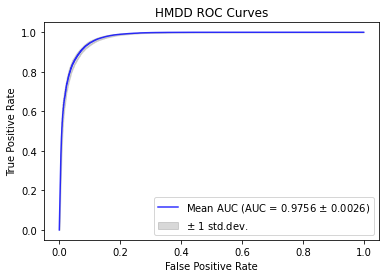

In [2]:
statistic_total_AUC(args, total_KFOLD_test_labels, total_FOLD_test_scores, KFOLD_test_out_come)

# Implement of GTGenie on HMDAD in 5-fold cross validation

In [3]:
import os
import random
import numpy as np
import tensorflow as tf
import argparse
from utils import sample
from train import train
from evaluation import *
from tfdeterminism import patch

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Training')
    parser.add_argument('--GPU', type=str, default='0')
    parser.add_argument('--epoch', type=int, default=300)
    parser.add_argument('--hid_units', type=int, default=64, help='number of neurons in GAT')
    parser.add_argument('--dense0', type=int, default=64, help='number of neurons in BFN')
    parser.add_argument('--dense1', type=int, default=32, help='number of neurons in BFN')
    parser.add_argument('--layers', type=int, default=4, help='number of layer aggregator in GAT')
    parser.add_argument('--lr', type=float, default=0.003)
    parser.add_argument('--attention_drop', type=float, default=0.0)
    parser.add_argument('--feedforward_drop', type=float, default=0.0)
    parser.add_argument('--dataset', type=str, default='HMDAD')
    args = parser.parse_known_args()[0]

    patch()
    SEED = 1000
    tf.set_random_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.GPU

    dataset = args.dataset
    times = 10
    total_KFOLD_test_labels, total_FOLD_test_scores = [], []
    KFOLD_test_out_come = []
    for i in range(times):
        for fold in range(5):
            print("times: %d, fold: %d" % (int(i), int(fold)))
            train_arr = np.loadtxt(f'data/{dataset}/data_dir/{i}/{fold}/train_arr.txt')
            test_arr = np.loadtxt(f'data/{dataset}/data_dir/{i}/{fold}/test_arr.txt')
            train_arr = train_arr.astype(np.int64)
            test_arr = test_arr.astype(np.int64)
            test_labels, scores, test_out_come = train(args, train_arr, test_arr, dataset, i, fold)
            total_KFOLD_test_labels.append(test_labels)
            total_FOLD_test_scores.append(scores)
            KFOLD_test_out_come.append(test_out_come)

    print('Finish!')

TensorFlow version 1.15.5 has been patched using tfdeterminism version 0.3.0


times: 0, fold: 0
----- Archi. hyperparams -----
 dataset: HMDAD
 epoch: 300
 lr: 0.003
 Graph units: [64]
 dense0: 64
 dense1: 32
 layers num: 4
 attention_drop:0.0
 feedforward_drop:0.0


/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.17115, train_auc = 0.44055, test_loss = 0.08609, test_auc = 0.52753, time = 0.76369
Epoch: 0010 | train_loss = 0.07705, train_auc = 0.97804, test_loss = 0.04909, test_auc = 0.92623, time = 0.01558
Epoch: 0020 | train_loss = 0.05404, train_auc = 0.98719, test_loss = 0.04159, test_auc = 0.92920, time = 0.01376
Epoch: 0030 | train_loss = 0.03764, train_auc = 0.99139, test_loss = 0.03972, test_auc = 0.94457, time = 0.01430
Epoch: 0040 | train_loss = 0.03148, train_auc = 0.99228, test_loss = 0.04125, test_auc = 0.94148, time = 0.01293
Epoch: 0050 | train_loss = 0.02557, train_auc = 0.99297, test_loss = 0.04618, test_auc = 0.92006, time = 0.01401
Epoch: 0060 | train_loss = 0.02350, train_auc = 0.99208, test_loss = 0.04171, test_auc = 0.93235, time = 0.01302
Epoch: 0070 | train_loss = 0.02312, train_auc = 0.99139, test_loss = 0.04186, test_auc = 0.93099, time = 0.01261
Epoch: 0080 | train_loss = 0.02302, train_auc = 0.99169, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15201, train_auc = 0.59184, test_loss = 0.09513, test_auc = 0.39790, time = 0.76798
Epoch: 0010 | train_loss = 0.07400, train_auc = 0.97317, test_loss = 0.05420, test_auc = 0.85809, time = 0.01506
Epoch: 0020 | train_loss = 0.05170, train_auc = 0.98402, test_loss = 0.05779, test_auc = 0.80926, time = 0.01357
Epoch: 0030 | train_loss = 0.03881, train_auc = 0.98955, test_loss = 0.04323, test_auc = 0.92784, time = 0.01336
Epoch: 0040 | train_loss = 0.02963, train_auc = 0.99073, test_loss = 0.04251, test_auc = 0.93759, time = 0.01603
Epoch: 0050 | train_loss = 0.02414, train_auc = 0.99164, test_loss = 0.04658, test_auc = 0.92901, time = 0.01270
Epoch: 0060 | train_loss = 0.02187, train_auc = 0.99207, test_loss = 0.03237, test_auc = 0.96321, time = 0.01363
Epoch: 0070 | train_loss = 0.02121, train_auc = 0.99225, test_loss = 0.03560, test_auc = 0.94630, time = 0.01252
Epoch: 0080 | train_loss = 0.02104, train_auc = 0.99238, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14086, train_auc = 0.59746, test_loss = 0.08690, test_auc = 0.52722, time = 0.76867
Epoch: 0010 | train_loss = 0.06868, train_auc = 0.96907, test_loss = 0.04605, test_auc = 0.93278, time = 0.01532
Epoch: 0020 | train_loss = 0.04714, train_auc = 0.99235, test_loss = 0.04389, test_auc = 0.94049, time = 0.01353
Epoch: 0030 | train_loss = 0.03270, train_auc = 0.99667, test_loss = 0.03764, test_auc = 0.95852, time = 0.01350
Epoch: 0040 | train_loss = 0.02691, train_auc = 0.99618, test_loss = 0.04177, test_auc = 0.92432, time = 0.01383
Epoch: 0050 | train_loss = 0.02161, train_auc = 0.99703, test_loss = 0.03806, test_auc = 0.95420, time = 0.01293
Epoch: 0060 | train_loss = 0.01641, train_auc = 0.99738, test_loss = 0.03448, test_auc = 0.96284, time = 0.01242
Epoch: 0070 | train_loss = 0.01452, train_auc = 0.99743, test_loss = 0.04154, test_auc = 0.94123, time = 0.01254
Epoch: 0080 | train_loss = 0.01371, train_auc = 0.99742, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16131, train_auc = 0.58409, test_loss = 0.10220, test_auc = 0.32926, time = 0.76008
Epoch: 0010 | train_loss = 0.08915, train_auc = 0.94670, test_loss = 0.04046, test_auc = 0.93975, time = 0.01494
Epoch: 0020 | train_loss = 0.05539, train_auc = 0.97954, test_loss = 0.03685, test_auc = 0.95333, time = 0.01313
Epoch: 0030 | train_loss = 0.04855, train_auc = 0.98478, test_loss = 0.04045, test_auc = 0.93383, time = 0.01301
Epoch: 0040 | train_loss = 0.04475, train_auc = 0.98541, test_loss = 0.03984, test_auc = 0.93932, time = 0.01235
Epoch: 0050 | train_loss = 0.03986, train_auc = 0.99006, test_loss = 0.03729, test_auc = 0.95704, time = 0.01250
Epoch: 0060 | train_loss = 0.03816, train_auc = 0.99057, test_loss = 0.04159, test_auc = 0.94228, time = 0.01228
Epoch: 0070 | train_loss = 0.03391, train_auc = 0.99197, test_loss = 0.04078, test_auc = 0.95704, time = 0.01235
Epoch: 0080 | train_loss = 0.03301, train_auc = 0.99203, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.17056, train_auc = 0.37118, test_loss = 0.08790, test_auc = 0.53333, time = 0.74657
Epoch: 0010 | train_loss = 0.07611, train_auc = 0.92504, test_loss = 0.05405, test_auc = 0.89222, time = 0.01507
Epoch: 0020 | train_loss = 0.05700, train_auc = 0.94924, test_loss = 0.04361, test_auc = 0.93846, time = 0.01323
Epoch: 0030 | train_loss = 0.03989, train_auc = 0.98799, test_loss = 0.05845, test_auc = 0.70346, time = 0.01262
Epoch: 0040 | train_loss = 0.03288, train_auc = 0.98842, test_loss = 0.03233, test_auc = 0.97000, time = 0.01206
Epoch: 0050 | train_loss = 0.02881, train_auc = 0.99085, test_loss = 0.03140, test_auc = 0.96049, time = 0.01202
Epoch: 0060 | train_loss = 0.02697, train_auc = 0.99078, test_loss = 0.03123, test_auc = 0.97185, time = 0.01198
Epoch: 0070 | train_loss = 0.02609, train_auc = 0.99122, test_loss = 0.06494, test_auc = 0.69568, time = 0.01232
Epoch: 0080 | train_loss = 0.02499, train_auc = 0.99080, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15525, train_auc = 0.56168, test_loss = 0.10235, test_auc = 0.32827, time = 0.78860
Epoch: 0010 | train_loss = 0.07838, train_auc = 0.93009, test_loss = 0.05967, test_auc = 0.90963, time = 0.01533
Epoch: 0020 | train_loss = 0.04964, train_auc = 0.98152, test_loss = 0.05885, test_auc = 0.85037, time = 0.01324
Epoch: 0030 | train_loss = 0.03973, train_auc = 0.98584, test_loss = 0.04023, test_auc = 0.95679, time = 0.01341
Epoch: 0040 | train_loss = 0.03417, train_auc = 0.98759, test_loss = 0.04049, test_auc = 0.95654, time = 0.01248
Epoch: 0050 | train_loss = 0.03290, train_auc = 0.98953, test_loss = 0.04041, test_auc = 0.94926, time = 0.01194
Epoch: 0060 | train_loss = 0.03135, train_auc = 0.99114, test_loss = 0.04113, test_auc = 0.94901, time = 0.01202
Epoch: 0070 | train_loss = 0.02986, train_auc = 0.99065, test_loss = 0.04228, test_auc = 0.95549, time = 0.01205
Epoch: 0080 | train_loss = 0.02836, train_auc = 0.98966, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16522, train_auc = 0.46095, test_loss = 0.10601, test_auc = 0.29074, time = 0.81135
Epoch: 0010 | train_loss = 0.06762, train_auc = 0.98076, test_loss = 0.05266, test_auc = 0.91494, time = 0.01581
Epoch: 0020 | train_loss = 0.05060, train_auc = 0.97900, test_loss = 0.05285, test_auc = 0.88407, time = 0.01349
Epoch: 0030 | train_loss = 0.04154, train_auc = 0.98730, test_loss = 0.03702, test_auc = 0.96383, time = 0.01344
Epoch: 0040 | train_loss = 0.03369, train_auc = 0.99236, test_loss = 0.03568, test_auc = 0.96698, time = 0.01228
Epoch: 0050 | train_loss = 0.02548, train_auc = 0.99397, test_loss = 0.03371, test_auc = 0.96469, time = 0.01260
Epoch: 0060 | train_loss = 0.02160, train_auc = 0.99453, test_loss = 0.03364, test_auc = 0.97173, time = 0.01239
Epoch: 0070 | train_loss = 0.02107, train_auc = 0.99401, test_loss = 0.03454, test_auc = 0.96346, time = 0.01336
Epoch: 0080 | train_loss = 0.02100, train_auc = 0.99405, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.18356, train_auc = 0.31819, test_loss = 0.07137, test_auc = 0.67617, time = 0.79169
Epoch: 0010 | train_loss = 0.07533, train_auc = 0.95777, test_loss = 0.05791, test_auc = 0.87037, time = 0.01513
Epoch: 0020 | train_loss = 0.05191, train_auc = 0.97890, test_loss = 0.04109, test_auc = 0.93852, time = 0.01411
Epoch: 0030 | train_loss = 0.04311, train_auc = 0.98368, test_loss = 0.03919, test_auc = 0.95654, time = 0.01276
Epoch: 0040 | train_loss = 0.03952, train_auc = 0.98586, test_loss = 0.03945, test_auc = 0.95630, time = 0.01290
Epoch: 0050 | train_loss = 0.03566, train_auc = 0.98736, test_loss = 0.03899, test_auc = 0.96074, time = 0.01207
Epoch: 0060 | train_loss = 0.03197, train_auc = 0.98794, test_loss = 0.04001, test_auc = 0.94840, time = 0.01256
Epoch: 0070 | train_loss = 0.03128, train_auc = 0.98780, test_loss = 0.03971, test_auc = 0.94512, time = 0.01256
Epoch: 0080 | train_loss = 0.03116, train_auc = 0.98792, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16642, train_auc = 0.46326, test_loss = 0.07866, test_auc = 0.62636, time = 0.79282
Epoch: 0010 | train_loss = 0.06726, train_auc = 0.96836, test_loss = 0.04963, test_auc = 0.90796, time = 0.01563
Epoch: 0020 | train_loss = 0.05615, train_auc = 0.97516, test_loss = 0.04564, test_auc = 0.90049, time = 0.01358
Epoch: 0030 | train_loss = 0.04591, train_auc = 0.98137, test_loss = 0.04264, test_auc = 0.93642, time = 0.01306
Epoch: 0040 | train_loss = 0.04318, train_auc = 0.98394, test_loss = 0.04223, test_auc = 0.93469, time = 0.01286
Epoch: 0050 | train_loss = 0.03643, train_auc = 0.98531, test_loss = 0.04335, test_auc = 0.91574, time = 0.01224
Epoch: 0060 | train_loss = 0.03200, train_auc = 0.98853, test_loss = 0.04202, test_auc = 0.93321, time = 0.01207
Epoch: 0070 | train_loss = 0.02869, train_auc = 0.98825, test_loss = 0.03983, test_auc = 0.92062, time = 0.01200
Epoch: 0080 | train_loss = 0.02835, train_auc = 0.98924, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15663, train_auc = 0.53721, test_loss = 0.08486, test_auc = 0.54500, time = 0.95336
Epoch: 0010 | train_loss = 0.06524, train_auc = 0.97495, test_loss = 0.05428, test_auc = 0.92722, time = 0.01550
Epoch: 0020 | train_loss = 0.04646, train_auc = 0.98448, test_loss = 0.03779, test_auc = 0.95593, time = 0.01471
Epoch: 0030 | train_loss = 0.03525, train_auc = 0.98972, test_loss = 0.03662, test_auc = 0.95432, time = 0.01362
Epoch: 0040 | train_loss = 0.02921, train_auc = 0.99064, test_loss = 0.03638, test_auc = 0.95772, time = 0.01309
Epoch: 0050 | train_loss = 0.02708, train_auc = 0.98850, test_loss = 0.03840, test_auc = 0.94636, time = 0.01411
Epoch: 0060 | train_loss = 0.02666, train_auc = 0.98904, test_loss = 0.03545, test_auc = 0.94747, time = 0.01292
Epoch: 0070 | train_loss = 0.02515, train_auc = 0.98766, test_loss = 0.03740, test_auc = 0.94957, time = 0.01357
Epoch: 0080 | train_loss = 0.02487, train_auc = 0.98967, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.17738, train_auc = 0.44282, test_loss = 0.08568, test_auc = 0.50222, time = 0.78074
Epoch: 0010 | train_loss = 0.06636, train_auc = 0.98239, test_loss = 0.04935, test_auc = 0.90926, time = 0.01503
Epoch: 0020 | train_loss = 0.04575, train_auc = 0.99103, test_loss = 0.04396, test_auc = 0.93963, time = 0.01517
Epoch: 0030 | train_loss = 0.03682, train_auc = 0.99255, test_loss = 0.04056, test_auc = 0.95407, time = 0.01535
Epoch: 0040 | train_loss = 0.02667, train_auc = 0.99524, test_loss = 0.04138, test_auc = 0.94667, time = 0.01385
Epoch: 0050 | train_loss = 0.02414, train_auc = 0.99502, test_loss = 0.04369, test_auc = 0.93765, time = 0.01293
Epoch: 0060 | train_loss = 0.02318, train_auc = 0.99566, test_loss = 0.03941, test_auc = 0.95235, time = 0.01378
Epoch: 0070 | train_loss = 0.01730, train_auc = 0.99751, test_loss = 0.03861, test_auc = 0.94975, time = 0.01232
Epoch: 0080 | train_loss = 0.01398, train_auc = 0.99750, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14981, train_auc = 0.62073, test_loss = 0.10856, test_auc = 0.23840, time = 0.78107
Epoch: 0010 | train_loss = 0.05743, train_auc = 0.97327, test_loss = 0.06496, test_auc = 0.89235, time = 0.01565
Epoch: 0020 | train_loss = 0.03200, train_auc = 0.99725, test_loss = 0.04369, test_auc = 0.94352, time = 0.01417
Epoch: 0030 | train_loss = 0.01886, train_auc = 0.99646, test_loss = 0.05382, test_auc = 0.90383, time = 0.01434
Epoch: 0040 | train_loss = 0.01813, train_auc = 0.99676, test_loss = 0.04531, test_auc = 0.92259, time = 0.01316
Epoch: 0050 | train_loss = 0.01658, train_auc = 0.99674, test_loss = 0.04072, test_auc = 0.95395, time = 0.01275
Epoch: 0060 | train_loss = 0.01636, train_auc = 0.99584, test_loss = 0.03946, test_auc = 0.95519, time = 0.01272
Epoch: 0070 | train_loss = 0.01629, train_auc = 0.99585, test_loss = 0.03957, test_auc = 0.95111, time = 0.01439
Epoch: 0080 | train_loss = 0.01627, train_auc = 0.99593, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.17573, train_auc = 0.38853, test_loss = 0.08890, test_auc = 0.50556, time = 0.78589
Epoch: 0010 | train_loss = 0.07730, train_auc = 0.94772, test_loss = 0.05250, test_auc = 0.92827, time = 0.01532
Epoch: 0020 | train_loss = 0.04688, train_auc = 0.98836, test_loss = 0.03839, test_auc = 0.96593, time = 0.01415
Epoch: 0030 | train_loss = 0.03181, train_auc = 0.99446, test_loss = 0.03398, test_auc = 0.97926, time = 0.01347
Epoch: 0040 | train_loss = 0.02373, train_auc = 0.99495, test_loss = 0.05351, test_auc = 0.94321, time = 0.01392
Epoch: 0050 | train_loss = 0.02019, train_auc = 0.99316, test_loss = 0.05147, test_auc = 0.94543, time = 0.01285
Epoch: 0060 | train_loss = 0.01915, train_auc = 0.99310, test_loss = 0.02963, test_auc = 0.96796, time = 0.01264
Epoch: 0070 | train_loss = 0.01886, train_auc = 0.99274, test_loss = 0.02940, test_auc = 0.96235, time = 0.01269
Epoch: 0080 | train_loss = 0.01880, train_auc = 0.99253, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16968, train_auc = 0.37563, test_loss = 0.08115, test_auc = 0.56562, time = 0.77186
Epoch: 0010 | train_loss = 0.06159, train_auc = 0.98718, test_loss = 0.03631, test_auc = 0.95210, time = 0.01506
Epoch: 0020 | train_loss = 0.04021, train_auc = 0.99549, test_loss = 0.03519, test_auc = 0.97160, time = 0.01310
Epoch: 0030 | train_loss = 0.02486, train_auc = 0.99894, test_loss = 0.03490, test_auc = 0.95358, time = 0.01353
Epoch: 0040 | train_loss = 0.01183, train_auc = 0.99921, test_loss = 0.03222, test_auc = 0.97062, time = 0.01294
Epoch: 0050 | train_loss = 0.00973, train_auc = 0.99912, test_loss = 0.03784, test_auc = 0.95543, time = 0.01219
Epoch: 0060 | train_loss = 0.01011, train_auc = 0.99851, test_loss = 0.03736, test_auc = 0.96191, time = 0.01281
Epoch: 0070 | train_loss = 0.00966, train_auc = 0.99875, test_loss = 0.03578, test_auc = 0.96914, time = 0.01270
Epoch: 0080 | train_loss = 0.00949, train_auc = 0.99852, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16868, train_auc = 0.42735, test_loss = 0.09466, test_auc = 0.44914, time = 0.77992
Epoch: 0010 | train_loss = 0.06412, train_auc = 0.98160, test_loss = 0.07289, test_auc = 0.83630, time = 0.01552
Epoch: 0020 | train_loss = 0.04273, train_auc = 0.99368, test_loss = 0.03813, test_auc = 0.95000, time = 0.01404
Epoch: 0030 | train_loss = 0.02939, train_auc = 0.99620, test_loss = 0.03826, test_auc = 0.94691, time = 0.01538
Epoch: 0040 | train_loss = 0.02076, train_auc = 0.99545, test_loss = 0.04161, test_auc = 0.94821, time = 0.01299
Epoch: 0050 | train_loss = 0.01907, train_auc = 0.99556, test_loss = 0.04090, test_auc = 0.94265, time = 0.01297
Epoch: 0060 | train_loss = 0.01887, train_auc = 0.99485, test_loss = 0.03809, test_auc = 0.94870, time = 0.01558
Epoch: 0070 | train_loss = 0.01879, train_auc = 0.99511, test_loss = 0.03800, test_auc = 0.93420, time = 0.01351
Epoch: 0080 | train_loss = 0.01674, train_auc = 0.99526, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16071, train_auc = 0.41349, test_loss = 0.09324, test_auc = 0.42840, time = 0.77375
Epoch: 0010 | train_loss = 0.06668, train_auc = 0.96976, test_loss = 0.04289, test_auc = 0.92074, time = 0.01526
Epoch: 0020 | train_loss = 0.04572, train_auc = 0.98491, test_loss = 0.05476, test_auc = 0.88556, time = 0.01395
Epoch: 0030 | train_loss = 0.03471, train_auc = 0.98507, test_loss = 0.03900, test_auc = 0.94747, time = 0.01303
Epoch: 0040 | train_loss = 0.02872, train_auc = 0.98992, test_loss = 0.04940, test_auc = 0.92296, time = 0.01366
Epoch: 0050 | train_loss = 0.02459, train_auc = 0.99515, test_loss = 0.05834, test_auc = 0.89006, time = 0.01280
Epoch: 0060 | train_loss = 0.02050, train_auc = 0.99535, test_loss = 0.04589, test_auc = 0.92543, time = 0.01315
Epoch: 0070 | train_loss = 0.01932, train_auc = 0.99600, test_loss = 0.05960, test_auc = 0.85074, time = 0.01364
Epoch: 0080 | train_loss = 0.01583, train_auc = 0.99748, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.18147, train_auc = 0.33811, test_loss = 0.06950, test_auc = 0.69512, time = 0.79536
Epoch: 0010 | train_loss = 0.06696, train_auc = 0.97747, test_loss = 0.04289, test_auc = 0.95938, time = 0.01552
Epoch: 0020 | train_loss = 0.04486, train_auc = 0.98910, test_loss = 0.03610, test_auc = 0.94432, time = 0.01530
Epoch: 0030 | train_loss = 0.03165, train_auc = 0.99165, test_loss = 0.02918, test_auc = 0.96691, time = 0.01311
Epoch: 0040 | train_loss = 0.02787, train_auc = 0.99193, test_loss = 0.03168, test_auc = 0.96370, time = 0.01215
Epoch: 0050 | train_loss = 0.02104, train_auc = 0.99317, test_loss = 0.03726, test_auc = 0.94043, time = 0.01213
Epoch: 0060 | train_loss = 0.01892, train_auc = 0.99457, test_loss = 0.04959, test_auc = 0.92593, time = 0.01244
Epoch: 0070 | train_loss = 0.01640, train_auc = 0.99465, test_loss = 0.03288, test_auc = 0.94827, time = 0.01203
Epoch: 0080 | train_loss = 0.01628, train_auc = 0.99457, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15044, train_auc = 0.57287, test_loss = 0.06822, test_auc = 0.70389, time = 0.75099
Epoch: 0010 | train_loss = 0.06592, train_auc = 0.97276, test_loss = 0.05839, test_auc = 0.90253, time = 0.01493
Epoch: 0020 | train_loss = 0.04325, train_auc = 0.98836, test_loss = 0.04755, test_auc = 0.93370, time = 0.01362
Epoch: 0030 | train_loss = 0.03307, train_auc = 0.98806, test_loss = 0.04410, test_auc = 0.94642, time = 0.01295
Epoch: 0040 | train_loss = 0.02742, train_auc = 0.98835, test_loss = 0.04334, test_auc = 0.94901, time = 0.01241
Epoch: 0050 | train_loss = 0.02769, train_auc = 0.98664, test_loss = 0.03661, test_auc = 0.96901, time = 0.01241
Epoch: 0060 | train_loss = 0.02786, train_auc = 0.98833, test_loss = 0.04210, test_auc = 0.96019, time = 0.01264
Epoch: 0070 | train_loss = 0.02698, train_auc = 0.98733, test_loss = 0.03703, test_auc = 0.95796, time = 0.01307
Epoch: 0080 | train_loss = 0.02664, train_auc = 0.98641, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14845, train_auc = 0.64697, test_loss = 0.07246, test_auc = 0.67525, time = 0.76853
Epoch: 0010 | train_loss = 0.07221, train_auc = 0.95304, test_loss = 0.05859, test_auc = 0.89549, time = 0.01597
Epoch: 0020 | train_loss = 0.04870, train_auc = 0.98275, test_loss = 0.04641, test_auc = 0.94012, time = 0.01413
Epoch: 0030 | train_loss = 0.03591, train_auc = 0.98500, test_loss = 0.04003, test_auc = 0.94259, time = 0.01511
Epoch: 0040 | train_loss = 0.03297, train_auc = 0.98604, test_loss = 0.03967, test_auc = 0.94870, time = 0.01326
Epoch: 0050 | train_loss = 0.03025, train_auc = 0.98474, test_loss = 0.04033, test_auc = 0.94901, time = 0.01591
Epoch: 0060 | train_loss = 0.02984, train_auc = 0.98604, test_loss = 0.04155, test_auc = 0.95426, time = 0.01278
Epoch: 0070 | train_loss = 0.02973, train_auc = 0.98487, test_loss = 0.04145, test_auc = 0.96019, time = 0.01275
Epoch: 0080 | train_loss = 0.02969, train_auc = 0.98498, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15774, train_auc = 0.57468, test_loss = 0.08537, test_auc = 0.54407, time = 0.75099
Epoch: 0010 | train_loss = 0.09089, train_auc = 0.94314, test_loss = 0.05680, test_auc = 0.89519, time = 0.01505
Epoch: 0020 | train_loss = 0.05211, train_auc = 0.98261, test_loss = 0.06257, test_auc = 0.64117, time = 0.01309
Epoch: 0030 | train_loss = 0.03574, train_auc = 0.98795, test_loss = 0.03849, test_auc = 0.90852, time = 0.01302
Epoch: 0040 | train_loss = 0.02515, train_auc = 0.98764, test_loss = 0.03660, test_auc = 0.93475, time = 0.01240
Epoch: 0050 | train_loss = 0.02340, train_auc = 0.98831, test_loss = 0.03456, test_auc = 0.94210, time = 0.01248
Epoch: 0060 | train_loss = 0.02310, train_auc = 0.98969, test_loss = 0.03513, test_auc = 0.93926, time = 0.01245
Epoch: 0070 | train_loss = 0.02302, train_auc = 0.99001, test_loss = 0.03523, test_auc = 0.94111, time = 0.01221
Epoch: 0080 | train_loss = 0.02300, train_auc = 0.99013, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15985, train_auc = 0.53601, test_loss = 0.05925, test_auc = 0.77463, time = 0.76869
Epoch: 0010 | train_loss = 0.06982, train_auc = 0.95402, test_loss = 0.05190, test_auc = 0.88037, time = 0.01576
Epoch: 0020 | train_loss = 0.04873, train_auc = 0.98462, test_loss = 0.04095, test_auc = 0.91265, time = 0.01473
Epoch: 0030 | train_loss = 0.03367, train_auc = 0.98974, test_loss = 0.04029, test_auc = 0.92914, time = 0.01332
Epoch: 0040 | train_loss = 0.02785, train_auc = 0.99045, test_loss = 0.04053, test_auc = 0.94111, time = 0.01379
Epoch: 0050 | train_loss = 0.02680, train_auc = 0.99089, test_loss = 0.04116, test_auc = 0.93457, time = 0.01255
Epoch: 0060 | train_loss = 0.02353, train_auc = 0.99158, test_loss = 0.04482, test_auc = 0.92877, time = 0.01272
Epoch: 0070 | train_loss = 0.02321, train_auc = 0.99164, test_loss = 0.04298, test_auc = 0.92235, time = 0.01260
Epoch: 0080 | train_loss = 0.02302, train_auc = 0.99210, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.17192, train_auc = 0.38940, test_loss = 0.09324, test_auc = 0.44457, time = 0.75347
Epoch: 0010 | train_loss = 0.06811, train_auc = 0.97625, test_loss = 0.05267, test_auc = 0.84160, time = 0.01555
Epoch: 0020 | train_loss = 0.04837, train_auc = 0.98071, test_loss = 0.04234, test_auc = 0.94716, time = 0.01361
Epoch: 0030 | train_loss = 0.04003, train_auc = 0.98106, test_loss = 0.04048, test_auc = 0.94321, time = 0.01298
Epoch: 0040 | train_loss = 0.03617, train_auc = 0.98093, test_loss = 0.03800, test_auc = 0.94475, time = 0.01260
Epoch: 0050 | train_loss = 0.03506, train_auc = 0.98144, test_loss = 0.03516, test_auc = 0.94809, time = 0.01246
Epoch: 0060 | train_loss = 0.03141, train_auc = 0.98007, test_loss = 0.04088, test_auc = 0.91543, time = 0.01253
Epoch: 0070 | train_loss = 0.02990, train_auc = 0.98389, test_loss = 0.04023, test_auc = 0.94414, time = 0.01228
Epoch: 0080 | train_loss = 0.02973, train_auc = 0.98518, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.18118, train_auc = 0.32294, test_loss = 0.08936, test_auc = 0.49451, time = 0.78307
Epoch: 0010 | train_loss = 0.06696, train_auc = 0.96617, test_loss = 0.04387, test_auc = 0.93963, time = 0.01562
Epoch: 0020 | train_loss = 0.04938, train_auc = 0.98691, test_loss = 0.03502, test_auc = 0.96741, time = 0.01395
Epoch: 0030 | train_loss = 0.03932, train_auc = 0.98841, test_loss = 0.03460, test_auc = 0.97210, time = 0.01353
Epoch: 0040 | train_loss = 0.03247, train_auc = 0.98927, test_loss = 0.03687, test_auc = 0.96383, time = 0.01310
Epoch: 0050 | train_loss = 0.03013, train_auc = 0.98885, test_loss = 0.03765, test_auc = 0.96481, time = 0.01301
Epoch: 0060 | train_loss = 0.02842, train_auc = 0.98929, test_loss = 0.03933, test_auc = 0.96370, time = 0.01361
Epoch: 0070 | train_loss = 0.02825, train_auc = 0.98745, test_loss = 0.04016, test_auc = 0.96333, time = 0.01296
Epoch: 0080 | train_loss = 0.02820, train_auc = 0.98727, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16742, train_auc = 0.41719, test_loss = 0.06998, test_auc = 0.69111, time = 0.78447
Epoch: 0010 | train_loss = 0.07657, train_auc = 0.95116, test_loss = 0.04981, test_auc = 0.92543, time = 0.01535
Epoch: 0020 | train_loss = 0.04797, train_auc = 0.98772, test_loss = 0.03817, test_auc = 0.94512, time = 0.01354
Epoch: 0030 | train_loss = 0.03350, train_auc = 0.99247, test_loss = 0.03043, test_auc = 0.96395, time = 0.01310
Epoch: 0040 | train_loss = 0.02626, train_auc = 0.99304, test_loss = 0.03387, test_auc = 0.95691, time = 0.01259
Epoch: 0050 | train_loss = 0.02415, train_auc = 0.99329, test_loss = 0.03517, test_auc = 0.93864, time = 0.01261
Epoch: 0060 | train_loss = 0.02165, train_auc = 0.99381, test_loss = 0.04274, test_auc = 0.92580, time = 0.01795
Epoch: 0070 | train_loss = 0.02117, train_auc = 0.99423, test_loss = 0.03922, test_auc = 0.92951, time = 0.01227
Epoch: 0080 | train_loss = 0.02105, train_auc = 0.99462, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15423, train_auc = 0.57684, test_loss = 0.10379, test_auc = 0.31765, time = 0.78755
Epoch: 0010 | train_loss = 0.05515, train_auc = 0.98925, test_loss = 0.06553, test_auc = 0.87815, time = 0.01555
Epoch: 0020 | train_loss = 0.03109, train_auc = 0.99591, test_loss = 0.04340, test_auc = 0.95309, time = 0.01368
Epoch: 0030 | train_loss = 0.01864, train_auc = 0.99670, test_loss = 0.04432, test_auc = 0.94759, time = 0.01343
Epoch: 0040 | train_loss = 0.01656, train_auc = 0.99680, test_loss = 0.03915, test_auc = 0.94673, time = 0.01251
Epoch: 0050 | train_loss = 0.01633, train_auc = 0.99583, test_loss = 0.03677, test_auc = 0.95315, time = 0.01222
Epoch: 0060 | train_loss = 0.01628, train_auc = 0.99582, test_loss = 0.03736, test_auc = 0.95796, time = 0.01216
Epoch: 0070 | train_loss = 0.01626, train_auc = 0.99583, test_loss = 0.03738, test_auc = 0.95772, time = 0.01231
Epoch: 0080 | train_loss = 0.01625, train_auc = 0.99586, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14295, train_auc = 0.63975, test_loss = 0.07840, test_auc = 0.59056, time = 0.88857
Epoch: 0010 | train_loss = 0.06737, train_auc = 0.96066, test_loss = 0.07284, test_auc = 0.80778, time = 0.01565
Epoch: 0020 | train_loss = 0.04603, train_auc = 0.98031, test_loss = 0.04526, test_auc = 0.93086, time = 0.01326
Epoch: 0030 | train_loss = 0.03699, train_auc = 0.98288, test_loss = 0.04093, test_auc = 0.94728, time = 0.01329
Epoch: 0040 | train_loss = 0.03323, train_auc = 0.98469, test_loss = 0.04192, test_auc = 0.95321, time = 0.01316
Epoch: 0050 | train_loss = 0.03138, train_auc = 0.98575, test_loss = 0.04671, test_auc = 0.93210, time = 0.01275
Epoch: 0060 | train_loss = 0.03002, train_auc = 0.98608, test_loss = 0.04583, test_auc = 0.93370, time = 0.01269
Epoch: 0070 | train_loss = 0.02964, train_auc = 0.98319, test_loss = 0.04000, test_auc = 0.95136, time = 0.01211
Epoch: 0080 | train_loss = 0.02852, train_auc = 0.98446, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.17139, train_auc = 0.39356, test_loss = 0.08008, test_auc = 0.60136, time = 0.78212
Epoch: 0010 | train_loss = 0.07356, train_auc = 0.97163, test_loss = 0.07357, test_auc = 0.82074, time = 0.01597
Epoch: 0020 | train_loss = 0.04982, train_auc = 0.98465, test_loss = 0.05675, test_auc = 0.90914, time = 0.01367
Epoch: 0030 | train_loss = 0.03965, train_auc = 0.98701, test_loss = 0.03659, test_auc = 0.95358, time = 0.02010
Epoch: 0040 | train_loss = 0.03375, train_auc = 0.98782, test_loss = 0.03455, test_auc = 0.95593, time = 0.01374
Epoch: 0050 | train_loss = 0.03181, train_auc = 0.98724, test_loss = 0.03574, test_auc = 0.95272, time = 0.01543
Epoch: 0060 | train_loss = 0.03047, train_auc = 0.98812, test_loss = 0.04505, test_auc = 0.93253, time = 0.01312
Epoch: 0070 | train_loss = 0.03012, train_auc = 0.98826, test_loss = 0.03864, test_auc = 0.94901, time = 0.01286
Epoch: 0080 | train_loss = 0.02985, train_auc = 0.98735, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15370, train_auc = 0.55224, test_loss = 0.08419, test_auc = 0.57210, time = 0.77478
Epoch: 0010 | train_loss = 0.06676, train_auc = 0.97195, test_loss = 0.03851, test_auc = 0.95383, time = 0.01505
Epoch: 0020 | train_loss = 0.04176, train_auc = 0.99291, test_loss = 0.03941, test_auc = 0.96370, time = 0.01487
Epoch: 0030 | train_loss = 0.02776, train_auc = 0.99632, test_loss = 0.03746, test_auc = 0.94691, time = 0.01380
Epoch: 0040 | train_loss = 0.01885, train_auc = 0.99627, test_loss = 0.03946, test_auc = 0.94333, time = 0.01276
Epoch: 0050 | train_loss = 0.01674, train_auc = 0.99642, test_loss = 0.04068, test_auc = 0.94031, time = 0.01270
Epoch: 0060 | train_loss = 0.01635, train_auc = 0.99552, test_loss = 0.04132, test_auc = 0.95321, time = 0.01227
Epoch: 0070 | train_loss = 0.01628, train_auc = 0.99553, test_loss = 0.04114, test_auc = 0.95630, time = 0.01239
Epoch: 0080 | train_loss = 0.01627, train_auc = 0.99461, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16926, train_auc = 0.42556, test_loss = 0.07835, test_auc = 0.62099, time = 0.77014
Epoch: 0010 | train_loss = 0.06669, train_auc = 0.98153, test_loss = 0.04486, test_auc = 0.91309, time = 0.01687
Epoch: 0020 | train_loss = 0.04313, train_auc = 0.99077, test_loss = 0.04919, test_auc = 0.91438, time = 0.01463
Epoch: 0030 | train_loss = 0.03235, train_auc = 0.99258, test_loss = 0.04913, test_auc = 0.91802, time = 0.01371
Epoch: 0040 | train_loss = 0.02234, train_auc = 0.99398, test_loss = 0.04779, test_auc = 0.90944, time = 0.01253
Epoch: 0050 | train_loss = 0.01807, train_auc = 0.99735, test_loss = 0.04745, test_auc = 0.91654, time = 0.01277
Epoch: 0060 | train_loss = 0.01427, train_auc = 0.99738, test_loss = 0.04196, test_auc = 0.92426, time = 0.01258
Epoch: 0070 | train_loss = 0.01357, train_auc = 0.99733, test_loss = 0.04430, test_auc = 0.92179, time = 0.01276
Epoch: 0080 | train_loss = 0.01338, train_auc = 0.99741, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15387, train_auc = 0.59921, test_loss = 0.08323, test_auc = 0.57222, time = 0.74621
Epoch: 0010 | train_loss = 0.07928, train_auc = 0.95517, test_loss = 0.05727, test_auc = 0.87580, time = 0.01499
Epoch: 0020 | train_loss = 0.05544, train_auc = 0.98184, test_loss = 0.04816, test_auc = 0.87099, time = 0.01342
Epoch: 0030 | train_loss = 0.04666, train_auc = 0.98082, test_loss = 0.06342, test_auc = 0.74284, time = 0.01236
Epoch: 0040 | train_loss = 0.04257, train_auc = 0.98033, test_loss = 0.04205, test_auc = 0.94043, time = 0.02174
Epoch: 0050 | train_loss = 0.04079, train_auc = 0.98010, test_loss = 0.03855, test_auc = 0.94204, time = 0.01225
Epoch: 0060 | train_loss = 0.03997, train_auc = 0.98007, test_loss = 0.04073, test_auc = 0.93228, time = 0.01261
Epoch: 0070 | train_loss = 0.03985, train_auc = 0.97941, test_loss = 0.04077, test_auc = 0.93765, time = 0.01261
Epoch: 0080 | train_loss = 0.03980, train_auc = 0.98061, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13356, train_auc = 0.76038, test_loss = 0.06073, test_auc = 0.77556, time = 0.76171
Epoch: 0010 | train_loss = 0.07228, train_auc = 0.96266, test_loss = 0.04872, test_auc = 0.91951, time = 0.01556
Epoch: 0020 | train_loss = 0.05165, train_auc = 0.98118, test_loss = 0.04400, test_auc = 0.93444, time = 0.01662
Epoch: 0030 | train_loss = 0.03437, train_auc = 0.98798, test_loss = 0.06255, test_auc = 0.78568, time = 0.01383
Epoch: 0040 | train_loss = 0.02651, train_auc = 0.98991, test_loss = 0.06536, test_auc = 0.62951, time = 0.01382
Epoch: 0050 | train_loss = 0.02349, train_auc = 0.99077, test_loss = 0.06148, test_auc = 0.65741, time = 0.01274
Epoch: 0060 | train_loss = 0.02123, train_auc = 0.98931, test_loss = 0.06389, test_auc = 0.65284, time = 0.01732
Epoch: 0070 | train_loss = 0.02109, train_auc = 0.99103, test_loss = 0.06355, test_auc = 0.74494, time = 0.01297
Epoch: 0080 | train_loss = 0.02101, train_auc = 0.99115, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14136, train_auc = 0.65902, test_loss = 0.06285, test_auc = 0.75543, time = 0.75430
Epoch: 0010 | train_loss = 0.06060, train_auc = 0.97276, test_loss = 0.05142, test_auc = 0.89840, time = 0.01519
Epoch: 0020 | train_loss = 0.03894, train_auc = 0.98980, test_loss = 0.03661, test_auc = 0.94753, time = 0.01494
Epoch: 0030 | train_loss = 0.02821, train_auc = 0.99161, test_loss = 0.03450, test_auc = 0.95796, time = 0.01361
Epoch: 0040 | train_loss = 0.02284, train_auc = 0.99191, test_loss = 0.03325, test_auc = 0.96037, time = 0.01272
Epoch: 0050 | train_loss = 0.02125, train_auc = 0.99206, test_loss = 0.03123, test_auc = 0.95080, time = 0.01272
Epoch: 0060 | train_loss = 0.02107, train_auc = 0.99109, test_loss = 0.03195, test_auc = 0.94852, time = 0.01354
Epoch: 0070 | train_loss = 0.02100, train_auc = 0.99113, test_loss = 0.03277, test_auc = 0.94889, time = 0.01243
Epoch: 0080 | train_loss = 0.02098, train_auc = 0.99115, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16809, train_auc = 0.40439, test_loss = 0.08622, test_auc = 0.55080, time = 0.80051
Epoch: 0010 | train_loss = 0.06997, train_auc = 0.97334, test_loss = 0.04127, test_auc = 0.95407, time = 0.01557
Epoch: 0020 | train_loss = 0.05450, train_auc = 0.98006, test_loss = 0.02573, test_auc = 0.97772, time = 0.01420
Epoch: 0030 | train_loss = 0.04025, train_auc = 0.98718, test_loss = 0.02314, test_auc = 0.97840, time = 0.01334
Epoch: 0040 | train_loss = 0.03208, train_auc = 0.98749, test_loss = 0.02898, test_auc = 0.97549, time = 0.01281
Epoch: 0050 | train_loss = 0.02947, train_auc = 0.98767, test_loss = 0.03324, test_auc = 0.97154, time = 0.01375
Epoch: 0060 | train_loss = 0.02792, train_auc = 0.99094, test_loss = 0.03239, test_auc = 0.97414, time = 0.01272
Epoch: 0070 | train_loss = 0.02520, train_auc = 0.98887, test_loss = 0.02966, test_auc = 0.97235, time = 0.01336
Epoch: 0080 | train_loss = 0.02335, train_auc = 0.99166, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14950, train_auc = 0.58769, test_loss = 0.10314, test_auc = 0.32204, time = 0.75653
Epoch: 0010 | train_loss = 0.06652, train_auc = 0.97812, test_loss = 0.06102, test_auc = 0.90012, time = 0.01480
Epoch: 0020 | train_loss = 0.04614, train_auc = 0.97818, test_loss = 0.03895, test_auc = 0.95623, time = 0.01532
Epoch: 0030 | train_loss = 0.03943, train_auc = 0.98146, test_loss = 0.03337, test_auc = 0.97383, time = 0.01315
Epoch: 0040 | train_loss = 0.03501, train_auc = 0.98349, test_loss = 0.03488, test_auc = 0.96975, time = 0.01262
Epoch: 0050 | train_loss = 0.03287, train_auc = 0.98319, test_loss = 0.04003, test_auc = 0.94370, time = 0.01269
Epoch: 0060 | train_loss = 0.03137, train_auc = 0.98286, test_loss = 0.03513, test_auc = 0.97543, time = 0.01255
Epoch: 0070 | train_loss = 0.03121, train_auc = 0.98255, test_loss = 0.03607, test_auc = 0.97506, time = 0.01235
Epoch: 0080 | train_loss = 0.03115, train_auc = 0.98188, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16171, train_auc = 0.47319, test_loss = 0.10393, test_auc = 0.31938, time = 0.76932
Epoch: 0010 | train_loss = 0.07579, train_auc = 0.96070, test_loss = 0.04839, test_auc = 0.92123, time = 0.01700
Epoch: 0020 | train_loss = 0.05113, train_auc = 0.98716, test_loss = 0.03746, test_auc = 0.95037, time = 0.01320
Epoch: 0030 | train_loss = 0.04335, train_auc = 0.98996, test_loss = 0.03481, test_auc = 0.96136, time = 0.01450
Epoch: 0040 | train_loss = 0.03672, train_auc = 0.99061, test_loss = 0.03261, test_auc = 0.97210, time = 0.01258
Epoch: 0050 | train_loss = 0.02931, train_auc = 0.99127, test_loss = 0.03366, test_auc = 0.97049, time = 0.01330
Epoch: 0060 | train_loss = 0.02341, train_auc = 0.99179, test_loss = 0.03371, test_auc = 0.97025, time = 0.01298
Epoch: 0070 | train_loss = 0.02188, train_auc = 0.99181, test_loss = 0.03852, test_auc = 0.96284, time = 0.01223
Epoch: 0080 | train_loss = 0.02131, train_auc = 0.99186, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14863, train_auc = 0.59224, test_loss = 0.10159, test_auc = 0.34370, time = 0.77426
Epoch: 0010 | train_loss = 0.07167, train_auc = 0.96671, test_loss = 0.05967, test_auc = 0.85148, time = 0.01505
Epoch: 0020 | train_loss = 0.04420, train_auc = 0.99139, test_loss = 0.03175, test_auc = 0.97173, time = 0.01516
Epoch: 0030 | train_loss = 0.02779, train_auc = 0.99514, test_loss = 0.03205, test_auc = 0.97494, time = 0.01345
Epoch: 0040 | train_loss = 0.02031, train_auc = 0.99449, test_loss = 0.03028, test_auc = 0.97840, time = 0.01286
Epoch: 0050 | train_loss = 0.01913, train_auc = 0.99540, test_loss = 0.03623, test_auc = 0.96519, time = 0.01238
Epoch: 0060 | train_loss = 0.01889, train_auc = 0.99356, test_loss = 0.03162, test_auc = 0.97148, time = 0.01220
Epoch: 0070 | train_loss = 0.01881, train_auc = 0.99363, test_loss = 0.03101, test_auc = 0.97716, time = 0.01265
Epoch: 0080 | train_loss = 0.01879, train_auc = 0.99365, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13444, train_auc = 0.71941, test_loss = 0.07991, test_auc = 0.60432, time = 0.77124
Epoch: 0010 | train_loss = 0.07163, train_auc = 0.97419, test_loss = 0.06323, test_auc = 0.93296, time = 0.01516
Epoch: 0020 | train_loss = 0.04267, train_auc = 0.99392, test_loss = 0.03634, test_auc = 0.96728, time = 0.01525
Epoch: 0030 | train_loss = 0.03139, train_auc = 0.99516, test_loss = 0.02926, test_auc = 0.97420, time = 0.01324
Epoch: 0040 | train_loss = 0.02001, train_auc = 0.99758, test_loss = 0.03204, test_auc = 0.96395, time = 0.01221
Epoch: 0050 | train_loss = 0.01544, train_auc = 0.99804, test_loss = 0.03202, test_auc = 0.97667, time = 0.01207
Epoch: 0060 | train_loss = 0.01067, train_auc = 0.99808, test_loss = 0.03195, test_auc = 0.97173, time = 0.01226
Epoch: 0070 | train_loss = 0.00968, train_auc = 0.99808, test_loss = 0.02535, test_auc = 0.97957, time = 0.01195
Epoch: 0080 | train_loss = 0.00945, train_auc = 0.99811, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14602, train_auc = 0.69040, test_loss = 0.08840, test_auc = 0.50012, time = 0.75437
Epoch: 0010 | train_loss = 0.08491, train_auc = 0.93789, test_loss = 0.05245, test_auc = 0.85191, time = 0.01512
Epoch: 0020 | train_loss = 0.05372, train_auc = 0.97815, test_loss = 0.06650, test_auc = 0.74556, time = 0.01432
Epoch: 0030 | train_loss = 0.05461, train_auc = 0.98448, test_loss = 0.04063, test_auc = 0.95833, time = 0.01317
Epoch: 0040 | train_loss = 0.04289, train_auc = 0.98620, test_loss = 0.04237, test_auc = 0.94907, time = 0.01251
Epoch: 0050 | train_loss = 0.03645, train_auc = 0.98894, test_loss = 0.04270, test_auc = 0.94537, time = 0.01191
Epoch: 0060 | train_loss = 0.03339, train_auc = 0.98958, test_loss = 0.04080, test_auc = 0.95093, time = 0.01250
Epoch: 0070 | train_loss = 0.03033, train_auc = 0.99231, test_loss = 0.03876, test_auc = 0.95833, time = 0.01236
Epoch: 0080 | train_loss = 0.02564, train_auc = 0.99186, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16277, train_auc = 0.45763, test_loss = 0.06947, test_auc = 0.69037, time = 0.77661
Epoch: 0010 | train_loss = 0.06649, train_auc = 0.97930, test_loss = 0.05133, test_auc = 0.87802, time = 0.01583
Epoch: 0020 | train_loss = 0.04148, train_auc = 0.99488, test_loss = 0.03472, test_auc = 0.94809, time = 0.01399
Epoch: 0030 | train_loss = 0.02527, train_auc = 0.99666, test_loss = 0.03656, test_auc = 0.93642, time = 0.01347
Epoch: 0040 | train_loss = 0.01962, train_auc = 0.99773, test_loss = 0.04853, test_auc = 0.91519, time = 0.01382
Epoch: 0050 | train_loss = 0.01663, train_auc = 0.99867, test_loss = 0.04109, test_auc = 0.92006, time = 0.01329
Epoch: 0060 | train_loss = 0.01341, train_auc = 1.00000, test_loss = 0.04214, test_auc = 0.92556, time = 0.01509
Epoch: 0070 | train_loss = 0.00337, train_auc = 1.00000, test_loss = 0.04548, test_auc = 0.90914, time = 0.01222
Epoch: 0080 | train_loss = 0.00194, train_auc = 1.00000, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.17008, train_auc = 0.40824, test_loss = 0.09633, test_auc = 0.41722, time = 0.75613
Epoch: 0010 | train_loss = 0.07046, train_auc = 0.97718, test_loss = 0.04156, test_auc = 0.93562, time = 0.01527
Epoch: 0020 | train_loss = 0.05028, train_auc = 0.98241, test_loss = 0.06130, test_auc = 0.89772, time = 0.01755
Epoch: 0030 | train_loss = 0.03607, train_auc = 0.98284, test_loss = 0.05182, test_auc = 0.90654, time = 0.01354
Epoch: 0040 | train_loss = 0.02969, train_auc = 0.98545, test_loss = 0.06053, test_auc = 0.66309, time = 0.01283
Epoch: 0050 | train_loss = 0.02695, train_auc = 0.98679, test_loss = 0.06038, test_auc = 0.82395, time = 0.01277
Epoch: 0060 | train_loss = 0.02661, train_auc = 0.98735, test_loss = 0.05953, test_auc = 0.82531, time = 0.01347
Epoch: 0070 | train_loss = 0.02655, train_auc = 0.98805, test_loss = 0.05527, test_auc = 0.92710, time = 0.01273
Epoch: 0080 | train_loss = 0.02653, train_auc = 0.98873, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.17241, train_auc = 0.37808, test_loss = 0.10049, test_auc = 0.35568, time = 0.78129
Epoch: 0010 | train_loss = 0.06130, train_auc = 0.98145, test_loss = 0.04908, test_auc = 0.90512, time = 0.01556
Epoch: 0020 | train_loss = 0.04409, train_auc = 0.98670, test_loss = 0.04558, test_auc = 0.93556, time = 0.01325
Epoch: 0030 | train_loss = 0.03909, train_auc = 0.98787, test_loss = 0.03935, test_auc = 0.95802, time = 0.01298
Epoch: 0040 | train_loss = 0.03487, train_auc = 0.98727, test_loss = 0.03789, test_auc = 0.95975, time = 0.01227
Epoch: 0050 | train_loss = 0.03265, train_auc = 0.98784, test_loss = 0.03789, test_auc = 0.94840, time = 0.01248
Epoch: 0060 | train_loss = 0.03036, train_auc = 0.98801, test_loss = 0.04121, test_auc = 0.93704, time = 0.01269
Epoch: 0070 | train_loss = 0.02988, train_auc = 0.98937, test_loss = 0.04027, test_auc = 0.94864, time = 0.01191
Epoch: 0080 | train_loss = 0.02972, train_auc = 0.98856, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.15044, train_auc = 0.53316, test_loss = 0.06950, test_auc = 0.69012, time = 0.78755
Epoch: 0010 | train_loss = 0.06284, train_auc = 0.98897, test_loss = 0.05836, test_auc = 0.88296, time = 0.01535
Epoch: 0020 | train_loss = 0.04112, train_auc = 0.99437, test_loss = 0.03645, test_auc = 0.95469, time = 0.01483
Epoch: 0030 | train_loss = 0.02986, train_auc = 0.99636, test_loss = 0.03539, test_auc = 0.96432, time = 0.01360
Epoch: 0040 | train_loss = 0.02267, train_auc = 0.99725, test_loss = 0.03702, test_auc = 0.97580, time = 0.01301
Epoch: 0050 | train_loss = 0.02123, train_auc = 0.99756, test_loss = 0.03429, test_auc = 0.96864, time = 0.01283
Epoch: 0060 | train_loss = 0.02079, train_auc = 0.99804, test_loss = 0.03242, test_auc = 0.97691, time = 0.01260
Epoch: 0070 | train_loss = 0.01680, train_auc = 0.99834, test_loss = 0.03236, test_auc = 0.97840, time = 0.01260
Epoch: 0080 | train_loss = 0.01633, train_auc = 0.99844, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13237, train_auc = 0.72026, test_loss = 0.10265, test_auc = 0.33333, time = 0.77634
Epoch: 0010 | train_loss = 0.06160, train_auc = 0.98723, test_loss = 0.04112, test_auc = 0.95302, time = 0.01523
Epoch: 0020 | train_loss = 0.03825, train_auc = 0.99576, test_loss = 0.03490, test_auc = 0.97377, time = 0.01625
Epoch: 0030 | train_loss = 0.02417, train_auc = 0.99711, test_loss = 0.03648, test_auc = 0.96111, time = 0.01873
Epoch: 0040 | train_loss = 0.01959, train_auc = 0.99713, test_loss = 0.03504, test_auc = 0.96648, time = 0.01358
Epoch: 0050 | train_loss = 0.01894, train_auc = 0.99696, test_loss = 0.03710, test_auc = 0.96512, time = 0.01288
Epoch: 0060 | train_loss = 0.01882, train_auc = 0.99605, test_loss = 0.03833, test_auc = 0.95840, time = 0.01257
Epoch: 0070 | train_loss = 0.01879, train_auc = 0.99599, test_loss = 0.03809, test_auc = 0.95784, time = 0.01223
Epoch: 0080 | train_loss = 0.01877, train_auc = 0.99596, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.18851, train_auc = 0.27525, test_loss = 0.06950, test_auc = 0.68981, time = 0.79720
Epoch: 0010 | train_loss = 0.06510, train_auc = 0.98245, test_loss = 0.05493, test_auc = 0.88901, time = 0.01565
Epoch: 0020 | train_loss = 0.04365, train_auc = 0.99355, test_loss = 0.03581, test_auc = 0.97006, time = 0.01373
Epoch: 0030 | train_loss = 0.02983, train_auc = 0.99704, test_loss = 0.06186, test_auc = 0.81988, time = 0.01282
Epoch: 0040 | train_loss = 0.02165, train_auc = 0.99793, test_loss = 0.03932, test_auc = 0.93370, time = 0.01273
Epoch: 0050 | train_loss = 0.01515, train_auc = 0.99924, test_loss = 0.03791, test_auc = 0.95679, time = 0.01887
Epoch: 0060 | train_loss = 0.01064, train_auc = 0.99924, test_loss = 0.03828, test_auc = 0.94370, time = 0.01343
Epoch: 0070 | train_loss = 0.00961, train_auc = 0.99942, test_loss = 0.04046, test_auc = 0.93673, time = 0.01300
Epoch: 0080 | train_loss = 0.00945, train_auc = 0.99926, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.13928, train_auc = 0.70294, test_loss = 0.06424, test_auc = 0.73889, time = 0.77845
Epoch: 0010 | train_loss = 0.06683, train_auc = 0.97665, test_loss = 0.04843, test_auc = 0.90019, time = 0.01568
Epoch: 0020 | train_loss = 0.05793, train_auc = 0.97945, test_loss = 0.04966, test_auc = 0.92617, time = 0.01538
Epoch: 0030 | train_loss = 0.04378, train_auc = 0.98868, test_loss = 0.03923, test_auc = 0.94790, time = 0.01377
Epoch: 0040 | train_loss = 0.03598, train_auc = 0.98999, test_loss = 0.03820, test_auc = 0.96352, time = 0.01260
Epoch: 0050 | train_loss = 0.03067, train_auc = 0.99120, test_loss = 0.03250, test_auc = 0.96111, time = 0.01253
Epoch: 0060 | train_loss = 0.02770, train_auc = 0.99164, test_loss = 0.03690, test_auc = 0.94932, time = 0.01253
Epoch: 0070 | train_loss = 0.02532, train_auc = 0.99327, test_loss = 0.03505, test_auc = 0.95531, time = 0.01258
Epoch: 0080 | train_loss = 0.02197, train_auc = 0.99527, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.16042, train_auc = 0.45278, test_loss = 0.06079, test_auc = 0.76648, time = 0.77169
Epoch: 0010 | train_loss = 0.08535, train_auc = 0.90236, test_loss = 0.05063, test_auc = 0.90599, time = 0.01518
Epoch: 0020 | train_loss = 0.05378, train_auc = 0.97782, test_loss = 0.04148, test_auc = 0.94975, time = 0.01386
Epoch: 0030 | train_loss = 0.04299, train_auc = 0.98304, test_loss = 0.03677, test_auc = 0.95728, time = 0.01263
Epoch: 0040 | train_loss = 0.03655, train_auc = 0.98410, test_loss = 0.03215, test_auc = 0.97191, time = 0.01251
Epoch: 0050 | train_loss = 0.03571, train_auc = 0.98466, test_loss = 0.03121, test_auc = 0.97444, time = 0.01209
Epoch: 0060 | train_loss = 0.03299, train_auc = 0.98437, test_loss = 0.02756, test_auc = 0.97698, time = 0.01250
Epoch: 0070 | train_loss = 0.03262, train_auc = 0.98584, test_loss = 0.03114, test_auc = 0.97438, time = 0.01225
Epoch: 0080 | train_loss = 0.03253, train_auc = 0.98480, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.18119, train_auc = 0.28975, test_loss = 0.08735, test_auc = 0.51123, time = 0.77427
Epoch: 0010 | train_loss = 0.06739, train_auc = 0.95972, test_loss = 0.05361, test_auc = 0.86352, time = 0.01526
Epoch: 0020 | train_loss = 0.04506, train_auc = 0.98241, test_loss = 0.04916, test_auc = 0.91191, time = 0.01526
Epoch: 0030 | train_loss = 0.03314, train_auc = 0.99336, test_loss = 0.04334, test_auc = 0.90920, time = 0.01283
Epoch: 0040 | train_loss = 0.02524, train_auc = 0.99376, test_loss = 0.04407, test_auc = 0.91019, time = 0.01366
Epoch: 0050 | train_loss = 0.02212, train_auc = 0.99302, test_loss = 0.04426, test_auc = 0.92932, time = 0.01258
Epoch: 0060 | train_loss = 0.01999, train_auc = 0.99472, test_loss = 0.04297, test_auc = 0.92802, time = 0.01260
Epoch: 0070 | train_loss = 0.01908, train_auc = 0.99490, test_loss = 0.04786, test_auc = 0.91395, time = 0.01247
Epoch: 0080 | train_loss = 0.01882, train_auc = 0.99430, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.12946, train_auc = 0.71815, test_loss = 0.08440, test_auc = 0.56179, time = 0.77925
Epoch: 0010 | train_loss = 0.05976, train_auc = 0.98587, test_loss = 0.07055, test_auc = 0.84722, time = 0.01538
Epoch: 0020 | train_loss = 0.03670, train_auc = 0.99201, test_loss = 0.05271, test_auc = 0.90901, time = 0.01374
Epoch: 0030 | train_loss = 0.02892, train_auc = 0.98976, test_loss = 0.04386, test_auc = 0.93704, time = 0.01275
Epoch: 0040 | train_loss = 0.02677, train_auc = 0.99318, test_loss = 0.04588, test_auc = 0.91790, time = 0.01310
Epoch: 0050 | train_loss = 0.02362, train_auc = 0.99225, test_loss = 0.04510, test_auc = 0.93969, time = 0.01284
Epoch: 0060 | train_loss = 0.02315, train_auc = 0.99241, test_loss = 0.04227, test_auc = 0.94981, time = 0.01290
Epoch: 0070 | train_loss = 0.02304, train_auc = 0.99251, test_loss = 0.04116, test_auc = 0.94691, time = 0.01237
Epoch: 0080 | train_loss = 0.02300, train_auc = 0.99257, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.14854, train_auc = 0.62419, test_loss = 0.08232, test_auc = 0.56901, time = 0.76287
Epoch: 0010 | train_loss = 0.08037, train_auc = 0.94790, test_loss = 0.06995, test_auc = 0.81630, time = 0.01500
Epoch: 0020 | train_loss = 0.04941, train_auc = 0.98485, test_loss = 0.04056, test_auc = 0.92988, time = 0.01338
Epoch: 0030 | train_loss = 0.03540, train_auc = 0.98842, test_loss = 0.03686, test_auc = 0.94259, time = 0.01334
Epoch: 0040 | train_loss = 0.02797, train_auc = 0.98724, test_loss = 0.03850, test_auc = 0.93901, time = 0.01234
Epoch: 0050 | train_loss = 0.02693, train_auc = 0.98736, test_loss = 0.03737, test_auc = 0.94759, time = 0.01224
Epoch: 0060 | train_loss = 0.02664, train_auc = 0.98751, test_loss = 0.03624, test_auc = 0.95716, time = 0.01218
Epoch: 0070 | train_loss = 0.02657, train_auc = 0.98765, test_loss = 0.03569, test_auc = 0.95407, time = 0.01251
Epoch: 0080 | train_loss = 0.02655, train_auc = 0.98679, 

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/'+dataset+'/microbes.xlsx',header=None,names=['id','microbe'])


nb_nodes:###### 331
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.18127, train_auc = 0.30792, test_loss = 0.07695, test_auc = 0.64364, time = 0.78640
Epoch: 0010 | train_loss = 0.06285, train_auc = 0.97580, test_loss = 0.04288, test_auc = 0.93568, time = 0.01591
Epoch: 0020 | train_loss = 0.04643, train_auc = 0.98294, test_loss = 0.03731, test_auc = 0.96432, time = 0.01408
Epoch: 0030 | train_loss = 0.03856, train_auc = 0.98596, test_loss = 0.04090, test_auc = 0.95481, time = 0.01345
Epoch: 0040 | train_loss = 0.03621, train_auc = 0.98492, test_loss = 0.03887, test_auc = 0.94901, time = 0.01318
Epoch: 0050 | train_loss = 0.03290, train_auc = 0.98724, test_loss = 0.03728, test_auc = 0.96074, time = 0.01315
Epoch: 0060 | train_loss = 0.03258, train_auc = 0.98715, test_loss = 0.03569, test_auc = 0.96840, time = 0.01227
Epoch: 0070 | train_loss = 0.03252, train_auc = 0.98732, test_loss = 0.03437, test_auc = 0.97049, time = 0.01352
Epoch: 0080 | train_loss = 0.03248, train_auc = 0.98764, 

association_matrix_shape: (39, 292)
times: 0 Fold: 0 Test AUC: 0.9495 Test AUPR: 0.9474
times: 0 Fold: 1 Test AUC: 0.9648 Test AUPR: 0.9527
times: 0 Fold: 2 Test AUC: 0.9629 Test AUPR: 0.9596
times: 0 Fold: 3 Test AUC: 0.9612 Test AUPR: 0.9576
times: 0 Fold: 4 Test AUC: 0.9719 Test AUPR: 0.9784
times: 1 Fold: 0 Test AUC: 0.9645 Test AUPR: 0.9644
times: 1 Fold: 1 Test AUC: 0.9731 Test AUPR: 0.9681
times: 1 Fold: 2 Test AUC: 0.9632 Test AUPR: 0.9591
times: 1 Fold: 3 Test AUC: 0.9402 Test AUPR: 0.9366
times: 1 Fold: 4 Test AUC: 0.9624 Test AUPR: 0.9574
times: 2 Fold: 0 Test AUC: 0.9587 Test AUPR: 0.9629
times: 2 Fold: 1 Test AUC: 0.9580 Test AUPR: 0.9644
times: 2 Fold: 2 Test AUC: 0.9793 Test AUPR: 0.9802
times: 2 Fold: 3 Test AUC: 0.9728 Test AUPR: 0.9729
times: 2 Fold: 4 Test AUC: 0.9677 Test AUPR: 0.9668
times: 3 Fold: 0 Test AUC: 0.9577 Test AUPR: 0.9509
times: 3 Fold: 1 Test AUC: 0.9690 Test AUPR: 0.9537
times: 3 Fold: 2 Test AUC: 0.9707 Test AUPR: 0.9718
times: 3 Fold: 3 Test AUC: 0

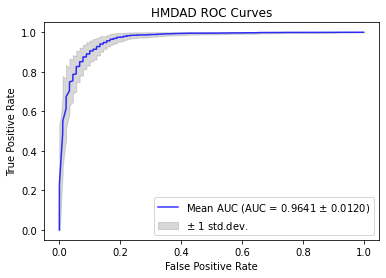

In [4]:
statistic_total_AUC(args, total_KFOLD_test_labels, total_FOLD_test_scores, KFOLD_test_out_come)

# Implement of GTGenie on LncRNADisease in 5-fold cross validation

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import argparse
from utils import sample
from train import train
from evaluation import *
from tfdeterminism import patch

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Training')
    parser.add_argument('--GPU', type=str, default='0')
    parser.add_argument('--epoch', type=int, default=300)
    parser.add_argument('--hid_units', type=int, default=64, help='number of neurons in GAT')
    parser.add_argument('--dense0', type=int, default=64, help='number of neurons in BFN')
    parser.add_argument('--dense1', type=int, default=32, help='number of neurons in BFN')
    parser.add_argument('--layers', type=int, default=4, help='number of layer aggregator in GAT')
    parser.add_argument('--lr', type=float, default=0.003)
    parser.add_argument('--attention_drop', type=float, default=0.1)
    parser.add_argument('--feedforward_drop', type=float, default=0.1)
    parser.add_argument('--dataset', type=str, default='LncRNADisease')
    args = parser.parse_known_args()[0]

    patch()
    SEED = 1000
    tf.set_random_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)
    os.environ["CUDA_VISIBLE_DEVICES"] = args.GPU

    dataset = args.dataset
    times = 10
    total_KFOLD_test_labels, total_FOLD_test_scores = [], []
    KFOLD_test_out_come = []
    for i in range(times):
        for fold in range(5):
            print("times: %d, fold: %d" % (int(i), int(fold)))
            train_arr = np.loadtxt(f'data/{dataset}/data_dir/{i}/{fold}/train_arr.txt')
            test_arr = np.loadtxt(f'data/{dataset}/data_dir/{i}/{fold}/test_arr.txt')
            train_arr = train_arr.astype(np.int64)
            test_arr = test_arr.astype(np.int64)
            test_labels, scores, test_out_come = train(args, train_arr, test_arr, dataset, i, fold)
            total_KFOLD_test_labels.append(test_labels)
            total_FOLD_test_scores.append(scores)
            KFOLD_test_out_come.append(test_out_come)
    print('Finish!')

TensorFlow version 1.15.5 has been patched using tfdeterminism version 0.3.0


times: 0, fold: 0
----- Archi. hyperparams -----
 dataset: LncRNADisease
 epoch: 300
 lr: 0.003
 Graph units: [64]
 dense0: 64
 dense1: 32
 layers num: 4
 attention_drop:0.1
 feedforward_drop:0.1


/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.keras.layers.Conv1D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Epoch: 0001 | train_loss = 0.06445, train_auc = 0.46856, test_loss = 0.03880, test_auc = 0.36856, time = 2.17254
Epoch: 0010 | train_loss = 0.03822, train_auc = 0.92992, test_loss = 0.02822, test_auc = 0.82354, time = 0.04894
Epoch: 0020 | train_loss = 0.03176, train_auc = 0.93756, test_loss = 0.01829, test_auc = 0.90357, time = 0.04370
Epoch: 0030 | train_loss = 0.02504, train_auc = 0.97215, test_loss = 0.01919, test_auc = 0.87314, time = 0.04443
Epoch: 0040 | train_loss = 0.02247, train_auc = 0.97743, test_loss = 0.01864, test_auc = 0.88737, time = 0.04236
Epoch: 0050 | train_loss = 0.01985, train_auc = 0.98362, test_loss = 0.01835, test_auc = 0.86784, time = 0.04247
Epoch: 0060 | train_loss = 0.0

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06200, train_auc = 0.48107, test_loss = 0.02700, test_auc = 0.71899, time = 0.85278
Epoch: 0010 | train_loss = 0.03812, train_auc = 0.93810, test_loss = 0.02452, test_auc = 0.87535, time = 0.05113
Epoch: 0020 | train_loss = 0.02881, train_auc = 0.95769, test_loss = 0.02023, test_auc = 0.87797, time = 0.04433
Epoch: 0030 | train_loss = 0.02524, train_auc = 0.96612, test_loss = 0.02133, test_auc = 0.81022, time = 0.04293
Epoch: 0040 | train_loss = 0.02268, train_auc = 0.97531, test_loss = 0.02155, test_auc = 0.80406, time = 0.04342
Epoch: 0050 | train_loss = 0.02033, train_auc = 0.97944, test_loss = 0.02092, test_auc = 0.80807, time = 0.04173
Epoch: 0060 | train_loss = 0.01866, train_auc = 0.98410, test_loss = 0.01529, test_auc = 0.94777, time = 0.04305
Epoch: 0070 | train_loss = 0.01769, train_auc = 0.98594, test_loss = 0.02004, test_auc = 0.86431, time = 0.04462
Epoch: 0080 | train_loss = 0.01587, train_auc = 0.98822,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06216, train_auc = 0.46557, test_loss = 0.02949, test_auc = 0.65024, time = 0.81532
Epoch: 0010 | train_loss = 0.03756, train_auc = 0.93321, test_loss = 0.02810, test_auc = 0.77583, time = 0.04729
Epoch: 0020 | train_loss = 0.02812, train_auc = 0.96080, test_loss = 0.02401, test_auc = 0.79122, time = 0.04425
Epoch: 0030 | train_loss = 0.02513, train_auc = 0.96927, test_loss = 0.02334, test_auc = 0.75685, time = 0.04236
Epoch: 0040 | train_loss = 0.02298, train_auc = 0.97501, test_loss = 0.02207, test_auc = 0.78309, time = 0.04220
Epoch: 0050 | train_loss = 0.02105, train_auc = 0.97906, test_loss = 0.02298, test_auc = 0.77462, time = 0.04269
Epoch: 0060 | train_loss = 0.02057, train_auc = 0.98240, test_loss = 0.02177, test_auc = 0.80462, time = 0.04264
Epoch: 0070 | train_loss = 0.01933, train_auc = 0.98360, test_loss = 0.02122, test_auc = 0.83951, time = 0.04236
Epoch: 0080 | train_loss = 0.01760, train_auc = 0.98773,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06184, train_auc = 0.49468, test_loss = 0.03907, test_auc = 0.36836, time = 0.79421
Epoch: 0010 | train_loss = 0.03962, train_auc = 0.93399, test_loss = 0.02572, test_auc = 0.91749, time = 0.04766
Epoch: 0020 | train_loss = 0.02989, train_auc = 0.95493, test_loss = 0.02113, test_auc = 0.84381, time = 0.04555
Epoch: 0030 | train_loss = 0.02582, train_auc = 0.96651, test_loss = 0.02318, test_auc = 0.74705, time = 0.04427
Epoch: 0040 | train_loss = 0.02342, train_auc = 0.97356, test_loss = 0.02327, test_auc = 0.76820, time = 0.04400
Epoch: 0050 | train_loss = 0.02217, train_auc = 0.97790, test_loss = 0.02312, test_auc = 0.77567, time = 0.04368
Epoch: 0060 | train_loss = 0.02100, train_auc = 0.97936, test_loss = 0.02298, test_auc = 0.77522, time = 0.04398
Epoch: 0070 | train_loss = 0.01933, train_auc = 0.98335, test_loss = 0.01539, test_auc = 0.94445, time = 0.04721
Epoch: 0080 | train_loss = 0.01875, train_auc = 0.98483,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06302, train_auc = 0.45285, test_loss = 0.03679, test_auc = 0.44744, time = 0.81101
Epoch: 0010 | train_loss = 0.03923, train_auc = 0.92942, test_loss = 0.03065, test_auc = 0.83499, time = 0.04969
Epoch: 0020 | train_loss = 0.02900, train_auc = 0.95760, test_loss = 0.01742, test_auc = 0.93147, time = 0.04545
Epoch: 0030 | train_loss = 0.02491, train_auc = 0.97220, test_loss = 0.02016, test_auc = 0.90234, time = 0.05048
Epoch: 0040 | train_loss = 0.02288, train_auc = 0.97897, test_loss = 0.01838, test_auc = 0.87307, time = 0.04493
Epoch: 0050 | train_loss = 0.02165, train_auc = 0.98127, test_loss = 0.01701, test_auc = 0.93237, time = 0.04706
Epoch: 0060 | train_loss = 0.01904, train_auc = 0.98720, test_loss = 0.01611, test_auc = 0.93960, time = 0.04375
Epoch: 0070 | train_loss = 0.01804, train_auc = 0.98854, test_loss = 0.01809, test_auc = 0.88007, time = 0.04546
Epoch: 0080 | train_loss = 0.01557, train_auc = 0.99176,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06522, train_auc = 0.41176, test_loss = 0.03942, test_auc = 0.36225, time = 0.80279
Epoch: 0010 | train_loss = 0.03573, train_auc = 0.93571, test_loss = 0.02757, test_auc = 0.83584, time = 0.04575
Epoch: 0020 | train_loss = 0.02820, train_auc = 0.95933, test_loss = 0.01772, test_auc = 0.92352, time = 0.04196
Epoch: 0030 | train_loss = 0.02506, train_auc = 0.97074, test_loss = 0.01783, test_auc = 0.91640, time = 0.04344
Epoch: 0040 | train_loss = 0.02202, train_auc = 0.97931, test_loss = 0.01853, test_auc = 0.91830, time = 0.04149
Epoch: 0050 | train_loss = 0.01998, train_auc = 0.98425, test_loss = 0.01905, test_auc = 0.90306, time = 0.04250
Epoch: 0060 | train_loss = 0.01845, train_auc = 0.98685, test_loss = 0.01481, test_auc = 0.95832, time = 0.04224
Epoch: 0070 | train_loss = 0.01789, train_auc = 0.98792, test_loss = 0.01536, test_auc = 0.94688, time = 0.04298
Epoch: 0080 | train_loss = 0.01555, train_auc = 0.99120,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06744, train_auc = 0.36556, test_loss = 0.03744, test_auc = 0.41941, time = 0.76532
Epoch: 0010 | train_loss = 0.04080, train_auc = 0.90253, test_loss = 0.02623, test_auc = 0.84365, time = 0.04542
Epoch: 0020 | train_loss = 0.03232, train_auc = 0.94763, test_loss = 0.01828, test_auc = 0.91989, time = 0.04250
Epoch: 0030 | train_loss = 0.02685, train_auc = 0.96616, test_loss = 0.01604, test_auc = 0.94166, time = 0.04206
Epoch: 0040 | train_loss = 0.02314, train_auc = 0.97486, test_loss = 0.01918, test_auc = 0.87271, time = 0.04250
Epoch: 0050 | train_loss = 0.02140, train_auc = 0.98120, test_loss = 0.01711, test_auc = 0.93372, time = 0.04215
Epoch: 0060 | train_loss = 0.01932, train_auc = 0.98557, test_loss = 0.01515, test_auc = 0.94911, time = 0.04527
Epoch: 0070 | train_loss = 0.01864, train_auc = 0.98769, test_loss = 0.01480, test_auc = 0.96004, time = 0.04166
Epoch: 0080 | train_loss = 0.01719, train_auc = 0.98882,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06200, train_auc = 0.52055, test_loss = 0.03526, test_auc = 0.49965, time = 0.78631
Epoch: 0010 | train_loss = 0.04094, train_auc = 0.91606, test_loss = 0.02786, test_auc = 0.87053, time = 0.04644
Epoch: 0020 | train_loss = 0.03104, train_auc = 0.95036, test_loss = 0.01650, test_auc = 0.92382, time = 0.04367
Epoch: 0030 | train_loss = 0.02588, train_auc = 0.96807, test_loss = 0.02386, test_auc = 0.73366, time = 0.04061
Epoch: 0040 | train_loss = 0.02403, train_auc = 0.97285, test_loss = 0.01926, test_auc = 0.88605, time = 0.04151
Epoch: 0050 | train_loss = 0.02188, train_auc = 0.97814, test_loss = 0.01999, test_auc = 0.89051, time = 0.04653
Epoch: 0060 | train_loss = 0.01978, train_auc = 0.98250, test_loss = 0.01965, test_auc = 0.81496, time = 0.05121
Epoch: 0070 | train_loss = 0.01868, train_auc = 0.98482, test_loss = 0.01459, test_auc = 0.94870, time = 0.04122
Epoch: 0080 | train_loss = 0.01724, train_auc = 0.98641,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06129, train_auc = 0.48973, test_loss = 0.03499, test_auc = 0.47877, time = 0.77991
Epoch: 0010 | train_loss = 0.04073, train_auc = 0.92723, test_loss = 0.02526, test_auc = 0.77010, time = 0.05070
Epoch: 0020 | train_loss = 0.03035, train_auc = 0.96129, test_loss = 0.01812, test_auc = 0.92360, time = 0.04705
Epoch: 0030 | train_loss = 0.02565, train_auc = 0.97099, test_loss = 0.01498, test_auc = 0.94713, time = 0.04655
Epoch: 0040 | train_loss = 0.02356, train_auc = 0.97780, test_loss = 0.01508, test_auc = 0.94898, time = 0.04481
Epoch: 0050 | train_loss = 0.02101, train_auc = 0.98273, test_loss = 0.02139, test_auc = 0.80063, time = 0.04429
Epoch: 0060 | train_loss = 0.01912, train_auc = 0.98665, test_loss = 0.01437, test_auc = 0.95251, time = 0.04429
Epoch: 0070 | train_loss = 0.01666, train_auc = 0.99039, test_loss = 0.01690, test_auc = 0.93389, time = 0.04418
Epoch: 0080 | train_loss = 0.01565, train_auc = 0.99222,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06410, train_auc = 0.43642, test_loss = 0.03436, test_auc = 0.51842, time = 0.80163
Epoch: 0010 | train_loss = 0.03884, train_auc = 0.93130, test_loss = 0.02749, test_auc = 0.79430, time = 0.04855
Epoch: 0020 | train_loss = 0.02933, train_auc = 0.95840, test_loss = 0.01699, test_auc = 0.92757, time = 0.04552
Epoch: 0030 | train_loss = 0.02470, train_auc = 0.97226, test_loss = 0.01644, test_auc = 0.93417, time = 0.04504
Epoch: 0040 | train_loss = 0.02314, train_auc = 0.97818, test_loss = 0.01593, test_auc = 0.94036, time = 0.04403
Epoch: 0050 | train_loss = 0.02029, train_auc = 0.98307, test_loss = 0.01515, test_auc = 0.95162, time = 0.04402
Epoch: 0060 | train_loss = 0.01895, train_auc = 0.98574, test_loss = 0.01571, test_auc = 0.92864, time = 0.04398
Epoch: 0070 | train_loss = 0.01762, train_auc = 0.98763, test_loss = 0.01582, test_auc = 0.92114, time = 0.04348
Epoch: 0080 | train_loss = 0.01670, train_auc = 0.98990,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06398, train_auc = 0.43773, test_loss = 0.03658, test_auc = 0.42821, time = 0.80241
Epoch: 0010 | train_loss = 0.03899, train_auc = 0.91284, test_loss = 0.03039, test_auc = 0.81903, time = 0.04774
Epoch: 0020 | train_loss = 0.02990, train_auc = 0.95302, test_loss = 0.01656, test_auc = 0.93276, time = 0.04676
Epoch: 0030 | train_loss = 0.02571, train_auc = 0.96971, test_loss = 0.02395, test_auc = 0.75903, time = 0.04339
Epoch: 0040 | train_loss = 0.02331, train_auc = 0.97710, test_loss = 0.02185, test_auc = 0.77111, time = 0.04367
Epoch: 0050 | train_loss = 0.02119, train_auc = 0.98166, test_loss = 0.01837, test_auc = 0.86639, time = 0.04342
Epoch: 0060 | train_loss = 0.01857, train_auc = 0.98730, test_loss = 0.01365, test_auc = 0.95900, time = 0.04161
Epoch: 0070 | train_loss = 0.01777, train_auc = 0.98670, test_loss = 0.02299, test_auc = 0.78090, time = 0.04499
Epoch: 0080 | train_loss = 0.01611, train_auc = 0.98898,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.05993, train_auc = 0.55241, test_loss = 0.03820, test_auc = 0.39325, time = 0.79301
Epoch: 0010 | train_loss = 0.03999, train_auc = 0.92570, test_loss = 0.02919, test_auc = 0.91072, time = 0.04775
Epoch: 0020 | train_loss = 0.02978, train_auc = 0.95799, test_loss = 0.01708, test_auc = 0.93123, time = 0.04274
Epoch: 0030 | train_loss = 0.02591, train_auc = 0.96702, test_loss = 0.01493, test_auc = 0.94742, time = 0.04165
Epoch: 0040 | train_loss = 0.02230, train_auc = 0.97806, test_loss = 0.01917, test_auc = 0.86187, time = 0.04102
Epoch: 0050 | train_loss = 0.02047, train_auc = 0.98248, test_loss = 0.01800, test_auc = 0.88120, time = 0.04250
Epoch: 0060 | train_loss = 0.01918, train_auc = 0.98487, test_loss = 0.01704, test_auc = 0.93235, time = 0.04226
Epoch: 0070 | train_loss = 0.01753, train_auc = 0.98694, test_loss = 0.01996, test_auc = 0.80919, time = 0.04215
Epoch: 0080 | train_loss = 0.01857, train_auc = 0.98623,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06596, train_auc = 0.40755, test_loss = 0.03833, test_auc = 0.38386, time = 0.81055
Epoch: 0010 | train_loss = 0.03833, train_auc = 0.92988, test_loss = 0.02637, test_auc = 0.90212, time = 0.04743
Epoch: 0020 | train_loss = 0.02843, train_auc = 0.96080, test_loss = 0.02184, test_auc = 0.84265, time = 0.04453
Epoch: 0030 | train_loss = 0.02405, train_auc = 0.97440, test_loss = 0.02105, test_auc = 0.82538, time = 0.04351
Epoch: 0040 | train_loss = 0.02191, train_auc = 0.98001, test_loss = 0.01872, test_auc = 0.89568, time = 0.04338
Epoch: 0050 | train_loss = 0.01989, train_auc = 0.98354, test_loss = 0.01846, test_auc = 0.89731, time = 0.04288
Epoch: 0060 | train_loss = 0.01892, train_auc = 0.98528, test_loss = 0.01693, test_auc = 0.92898, time = 0.04290
Epoch: 0070 | train_loss = 0.01770, train_auc = 0.98734, test_loss = 0.01956, test_auc = 0.90867, time = 0.04444
Epoch: 0080 | train_loss = 0.01605, train_auc = 0.98919,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06043, train_auc = 0.52470, test_loss = 0.02958, test_auc = 0.66417, time = 0.81284
Epoch: 0010 | train_loss = 0.04021, train_auc = 0.91325, test_loss = 0.02627, test_auc = 0.82522, time = 0.04821
Epoch: 0020 | train_loss = 0.02979, train_auc = 0.95730, test_loss = 0.01761, test_auc = 0.92671, time = 0.04670
Epoch: 0030 | train_loss = 0.02617, train_auc = 0.96931, test_loss = 0.02191, test_auc = 0.83365, time = 0.04440
Epoch: 0040 | train_loss = 0.02287, train_auc = 0.97876, test_loss = 0.02201, test_auc = 0.79440, time = 0.04439
Epoch: 0050 | train_loss = 0.02222, train_auc = 0.98076, test_loss = 0.01555, test_auc = 0.94667, time = 0.04561
Epoch: 0060 | train_loss = 0.01960, train_auc = 0.98652, test_loss = 0.01844, test_auc = 0.91816, time = 0.04355
Epoch: 0070 | train_loss = 0.01883, train_auc = 0.98671, test_loss = 0.01687, test_auc = 0.93208, time = 0.04307
Epoch: 0080 | train_loss = 0.01761, train_auc = 0.98891,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06048, train_auc = 0.52023, test_loss = 0.03919, test_auc = 0.35947, time = 0.80543
Epoch: 0010 | train_loss = 0.03705, train_auc = 0.93314, test_loss = 0.02356, test_auc = 0.86948, time = 0.04774
Epoch: 0020 | train_loss = 0.02736, train_auc = 0.96430, test_loss = 0.01779, test_auc = 0.91970, time = 0.04276
Epoch: 0030 | train_loss = 0.02357, train_auc = 0.97571, test_loss = 0.02279, test_auc = 0.79502, time = 0.04278
Epoch: 0040 | train_loss = 0.02163, train_auc = 0.97900, test_loss = 0.02264, test_auc = 0.81729, time = 0.04116
Epoch: 0050 | train_loss = 0.02051, train_auc = 0.98184, test_loss = 0.02167, test_auc = 0.86342, time = 0.04505
Epoch: 0060 | train_loss = 0.01877, train_auc = 0.98530, test_loss = 0.02105, test_auc = 0.90199, time = 0.04106
Epoch: 0070 | train_loss = 0.01698, train_auc = 0.98766, test_loss = 0.01490, test_auc = 0.94526, time = 0.04107
Epoch: 0080 | train_loss = 0.01780, train_auc = 0.98693,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06232, train_auc = 0.46876, test_loss = 0.03646, test_auc = 0.45128, time = 0.82695
Epoch: 0010 | train_loss = 0.03718, train_auc = 0.93275, test_loss = 0.02394, test_auc = 0.85798, time = 0.04976
Epoch: 0020 | train_loss = 0.02913, train_auc = 0.95339, test_loss = 0.01820, test_auc = 0.90911, time = 0.04589
Epoch: 0030 | train_loss = 0.02518, train_auc = 0.96951, test_loss = 0.01734, test_auc = 0.91465, time = 0.04509
Epoch: 0040 | train_loss = 0.02280, train_auc = 0.97674, test_loss = 0.01774, test_auc = 0.91364, time = 0.04412
Epoch: 0050 | train_loss = 0.02358, train_auc = 0.96663, test_loss = 0.01649, test_auc = 0.93776, time = 0.04514
Epoch: 0060 | train_loss = 0.02017, train_auc = 0.98089, test_loss = 0.01720, test_auc = 0.92538, time = 0.04404
Epoch: 0070 | train_loss = 0.01754, train_auc = 0.98596, test_loss = 0.01658, test_auc = 0.92537, time = 0.04468
Epoch: 0080 | train_loss = 0.01759, train_auc = 0.98643,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06495, train_auc = 0.44086, test_loss = 0.03963, test_auc = 0.33398, time = 0.80590
Epoch: 0010 | train_loss = 0.04289, train_auc = 0.88904, test_loss = 0.02499, test_auc = 0.84557, time = 0.05010
Epoch: 0020 | train_loss = 0.03198, train_auc = 0.94575, test_loss = 0.02104, test_auc = 0.84420, time = 0.04819
Epoch: 0030 | train_loss = 0.02838, train_auc = 0.95577, test_loss = 0.01745, test_auc = 0.91621, time = 0.04618
Epoch: 0040 | train_loss = 0.02530, train_auc = 0.96931, test_loss = 0.01896, test_auc = 0.88124, time = 0.04646
Epoch: 0050 | train_loss = 0.02434, train_auc = 0.97254, test_loss = 0.01949, test_auc = 0.85627, time = 0.04553
Epoch: 0060 | train_loss = 0.02176, train_auc = 0.97986, test_loss = 0.02010, test_auc = 0.81930, time = 0.04551
Epoch: 0070 | train_loss = 0.02221, train_auc = 0.97879, test_loss = 0.01717, test_auc = 0.90879, time = 0.04567
Epoch: 0080 | train_loss = 0.01913, train_auc = 0.98783,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.05626, train_auc = 0.60090, test_loss = 0.03842, test_auc = 0.39545, time = 0.80351
Epoch: 0010 | train_loss = 0.03758, train_auc = 0.92850, test_loss = 0.02620, test_auc = 0.85330, time = 0.04781
Epoch: 0020 | train_loss = 0.03043, train_auc = 0.95291, test_loss = 0.02167, test_auc = 0.82724, time = 0.04291
Epoch: 0030 | train_loss = 0.02635, train_auc = 0.96589, test_loss = 0.02025, test_auc = 0.83654, time = 0.04297
Epoch: 0040 | train_loss = 0.02346, train_auc = 0.97491, test_loss = 0.02113, test_auc = 0.80225, time = 0.04358
Epoch: 0050 | train_loss = 0.02130, train_auc = 0.98029, test_loss = 0.02023, test_auc = 0.86732, time = 0.04398
Epoch: 0060 | train_loss = 0.01865, train_auc = 0.98493, test_loss = 0.01999, test_auc = 0.85535, time = 0.04423
Epoch: 0070 | train_loss = 0.01909, train_auc = 0.98538, test_loss = 0.01435, test_auc = 0.94660, time = 0.04375
Epoch: 0080 | train_loss = 0.01991, train_auc = 0.98414,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06159, train_auc = 0.50687, test_loss = 0.03923, test_auc = 0.35235, time = 0.80570
Epoch: 0010 | train_loss = 0.03918, train_auc = 0.93055, test_loss = 0.02398, test_auc = 0.88785, time = 0.04975
Epoch: 0020 | train_loss = 0.03057, train_auc = 0.95443, test_loss = 0.01655, test_auc = 0.92666, time = 0.04582
Epoch: 0030 | train_loss = 0.02757, train_auc = 0.96200, test_loss = 0.01989, test_auc = 0.86032, time = 0.04289
Epoch: 0040 | train_loss = 0.02515, train_auc = 0.97013, test_loss = 0.02071, test_auc = 0.83085, time = 0.04225
Epoch: 0050 | train_loss = 0.02255, train_auc = 0.97829, test_loss = 0.01583, test_auc = 0.93872, time = 0.04324
Epoch: 0060 | train_loss = 0.01998, train_auc = 0.98391, test_loss = 0.01410, test_auc = 0.95269, time = 0.04365
Epoch: 0070 | train_loss = 0.01955, train_auc = 0.98585, test_loss = 0.01485, test_auc = 0.95751, time = 0.04550
Epoch: 0080 | train_loss = 0.01743, train_auc = 0.98911,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06390, train_auc = 0.45427, test_loss = 0.03890, test_auc = 0.37889, time = 0.79701
Epoch: 0010 | train_loss = 0.04257, train_auc = 0.89846, test_loss = 0.02539, test_auc = 0.82053, time = 0.04698
Epoch: 0020 | train_loss = 0.03033, train_auc = 0.95533, test_loss = 0.01573, test_auc = 0.94398, time = 0.04307
Epoch: 0030 | train_loss = 0.02657, train_auc = 0.96300, test_loss = 0.01873, test_auc = 0.89284, time = 0.04238
Epoch: 0040 | train_loss = 0.02381, train_auc = 0.97370, test_loss = 0.01423, test_auc = 0.95862, time = 0.04208
Epoch: 0050 | train_loss = 0.02123, train_auc = 0.98028, test_loss = 0.01682, test_auc = 0.90617, time = 0.04224
Epoch: 0060 | train_loss = 0.01943, train_auc = 0.98432, test_loss = 0.01325, test_auc = 0.96985, time = 0.04394
Epoch: 0070 | train_loss = 0.01755, train_auc = 0.98703, test_loss = 0.01541, test_auc = 0.95287, time = 0.04247
Epoch: 0080 | train_loss = 0.01674, train_auc = 0.98794,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06325, train_auc = 0.46824, test_loss = 0.03109, test_auc = 0.60947, time = 0.81073
Epoch: 0010 | train_loss = 0.03887, train_auc = 0.92625, test_loss = 0.03069, test_auc = 0.81115, time = 0.04821
Epoch: 0020 | train_loss = 0.02729, train_auc = 0.96823, test_loss = 0.01546, test_auc = 0.96163, time = 0.04480
Epoch: 0030 | train_loss = 0.02330, train_auc = 0.97948, test_loss = 0.02081, test_auc = 0.86228, time = 0.04436
Epoch: 0040 | train_loss = 0.02040, train_auc = 0.98568, test_loss = 0.01843, test_auc = 0.88541, time = 0.04307
Epoch: 0050 | train_loss = 0.01898, train_auc = 0.98874, test_loss = 0.01573, test_auc = 0.94393, time = 0.04271
Epoch: 0060 | train_loss = 0.01697, train_auc = 0.99145, test_loss = 0.02038, test_auc = 0.86453, time = 0.04269
Epoch: 0070 | train_loss = 0.01527, train_auc = 0.99367, test_loss = 0.01494, test_auc = 0.94782, time = 0.04369
Epoch: 0080 | train_loss = 0.01302, train_auc = 0.99570,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06527, train_auc = 0.42871, test_loss = 0.03990, test_auc = 0.32340, time = 0.78487
Epoch: 0010 | train_loss = 0.04230, train_auc = 0.91352, test_loss = 0.03106, test_auc = 0.86688, time = 0.04948
Epoch: 0020 | train_loss = 0.03104, train_auc = 0.95119, test_loss = 0.01723, test_auc = 0.92870, time = 0.04961
Epoch: 0030 | train_loss = 0.02520, train_auc = 0.97270, test_loss = 0.02105, test_auc = 0.82474, time = 0.04367
Epoch: 0040 | train_loss = 0.02221, train_auc = 0.98101, test_loss = 0.01919, test_auc = 0.86643, time = 0.04327
Epoch: 0050 | train_loss = 0.01999, train_auc = 0.98524, test_loss = 0.01980, test_auc = 0.87685, time = 0.04304
Epoch: 0060 | train_loss = 0.01733, train_auc = 0.98956, test_loss = 0.01681, test_auc = 0.93200, time = 0.04278
Epoch: 0070 | train_loss = 0.01645, train_auc = 0.99099, test_loss = 0.02136, test_auc = 0.82769, time = 0.04287
Epoch: 0080 | train_loss = 0.01702, train_auc = 0.98965,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06008, train_auc = 0.51944, test_loss = 0.03386, test_auc = 0.52511, time = 0.79736
Epoch: 0010 | train_loss = 0.03665, train_auc = 0.93809, test_loss = 0.02501, test_auc = 0.80021, time = 0.04545
Epoch: 0020 | train_loss = 0.02753, train_auc = 0.96856, test_loss = 0.01903, test_auc = 0.89819, time = 0.04379
Epoch: 0030 | train_loss = 0.02331, train_auc = 0.97916, test_loss = 0.01981, test_auc = 0.84471, time = 0.04318
Epoch: 0040 | train_loss = 0.02110, train_auc = 0.98367, test_loss = 0.01566, test_auc = 0.94913, time = 0.04322
Epoch: 0050 | train_loss = 0.01892, train_auc = 0.98771, test_loss = 0.01435, test_auc = 0.96024, time = 0.04274
Epoch: 0060 | train_loss = 0.01713, train_auc = 0.98962, test_loss = 0.01832, test_auc = 0.86334, time = 0.04249
Epoch: 0070 | train_loss = 0.01652, train_auc = 0.99098, test_loss = 0.01653, test_auc = 0.91483, time = 0.04314
Epoch: 0080 | train_loss = 0.01504, train_auc = 0.99329,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06010, train_auc = 0.54936, test_loss = 0.03943, test_auc = 0.35475, time = 0.79593
Epoch: 0010 | train_loss = 0.04158, train_auc = 0.93110, test_loss = 0.02773, test_auc = 0.92325, time = 0.04876
Epoch: 0020 | train_loss = 0.03095, train_auc = 0.94753, test_loss = 0.01830, test_auc = 0.91164, time = 0.04460
Epoch: 0030 | train_loss = 0.02537, train_auc = 0.96978, test_loss = 0.02081, test_auc = 0.80788, time = 0.04404
Epoch: 0040 | train_loss = 0.02313, train_auc = 0.97553, test_loss = 0.02075, test_auc = 0.83218, time = 0.04350
Epoch: 0050 | train_loss = 0.02137, train_auc = 0.97978, test_loss = 0.02221, test_auc = 0.79812, time = 0.04425
Epoch: 0060 | train_loss = 0.01866, train_auc = 0.98370, test_loss = 0.02202, test_auc = 0.78802, time = 0.04430
Epoch: 0070 | train_loss = 0.01729, train_auc = 0.98617, test_loss = 0.02098, test_auc = 0.82330, time = 0.04306
Epoch: 0080 | train_loss = 0.01667, train_auc = 0.98840,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.05965, train_auc = 0.54132, test_loss = 0.03361, test_auc = 0.47021, time = 0.79224
Epoch: 0010 | train_loss = 0.04021, train_auc = 0.90967, test_loss = 0.02187, test_auc = 0.88265, time = 0.04776
Epoch: 0020 | train_loss = 0.03010, train_auc = 0.94666, test_loss = 0.01933, test_auc = 0.87896, time = 0.04429
Epoch: 0030 | train_loss = 0.02474, train_auc = 0.97596, test_loss = 0.01960, test_auc = 0.86237, time = 0.04296
Epoch: 0040 | train_loss = 0.02266, train_auc = 0.97809, test_loss = 0.02212, test_auc = 0.81638, time = 0.04148
Epoch: 0050 | train_loss = 0.02154, train_auc = 0.98164, test_loss = 0.01870, test_auc = 0.89813, time = 0.04376
Epoch: 0060 | train_loss = 0.01965, train_auc = 0.98647, test_loss = 0.01839, test_auc = 0.91706, time = 0.04364
Epoch: 0070 | train_loss = 0.01816, train_auc = 0.98910, test_loss = 0.01985, test_auc = 0.88772, time = 0.04345
Epoch: 0080 | train_loss = 0.01715, train_auc = 0.99015,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06499, train_auc = 0.43359, test_loss = 0.03479, test_auc = 0.49591, time = 0.78336
Epoch: 0010 | train_loss = 0.04078, train_auc = 0.92451, test_loss = 0.02395, test_auc = 0.90107, time = 0.04871
Epoch: 0020 | train_loss = 0.03026, train_auc = 0.95460, test_loss = 0.01830, test_auc = 0.90138, time = 0.04323
Epoch: 0030 | train_loss = 0.02612, train_auc = 0.96758, test_loss = 0.01598, test_auc = 0.94177, time = 0.04133
Epoch: 0040 | train_loss = 0.02367, train_auc = 0.97612, test_loss = 0.02151, test_auc = 0.81462, time = 0.04178
Epoch: 0050 | train_loss = 0.02305, train_auc = 0.97647, test_loss = 0.01602, test_auc = 0.94293, time = 0.04220
Epoch: 0060 | train_loss = 0.01999, train_auc = 0.98381, test_loss = 0.01785, test_auc = 0.93271, time = 0.04175
Epoch: 0070 | train_loss = 0.01874, train_auc = 0.98648, test_loss = 0.02010, test_auc = 0.85849, time = 0.04218
Epoch: 0080 | train_loss = 0.01624, train_auc = 0.99138,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06374, train_auc = 0.46993, test_loss = 0.04305, test_auc = 0.18292, time = 0.78086
Epoch: 0010 | train_loss = 0.03975, train_auc = 0.93274, test_loss = 0.02417, test_auc = 0.86198, time = 0.04974
Epoch: 0020 | train_loss = 0.02917, train_auc = 0.95878, test_loss = 0.01847, test_auc = 0.88563, time = 0.04485
Epoch: 0030 | train_loss = 0.02553, train_auc = 0.97206, test_loss = 0.01890, test_auc = 0.89827, time = 0.04346
Epoch: 0040 | train_loss = 0.02250, train_auc = 0.98073, test_loss = 0.02127, test_auc = 0.79517, time = 0.04368
Epoch: 0050 | train_loss = 0.02012, train_auc = 0.98655, test_loss = 0.01720, test_auc = 0.91752, time = 0.04294
Epoch: 0060 | train_loss = 0.01786, train_auc = 0.98994, test_loss = 0.01788, test_auc = 0.90862, time = 0.04334
Epoch: 0070 | train_loss = 0.01714, train_auc = 0.99181, test_loss = 0.01442, test_auc = 0.95630, time = 0.04322
Epoch: 0080 | train_loss = 0.01536, train_auc = 0.99413,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.05968, train_auc = 0.54863, test_loss = 0.03376, test_auc = 0.51989, time = 0.77471
Epoch: 0010 | train_loss = 0.03927, train_auc = 0.91840, test_loss = 0.02740, test_auc = 0.78837, time = 0.04948
Epoch: 0020 | train_loss = 0.03058, train_auc = 0.94936, test_loss = 0.01894, test_auc = 0.93120, time = 0.04737
Epoch: 0030 | train_loss = 0.02677, train_auc = 0.95832, test_loss = 0.01595, test_auc = 0.93645, time = 0.04360
Epoch: 0040 | train_loss = 0.02419, train_auc = 0.96713, test_loss = 0.01510, test_auc = 0.94947, time = 0.04334
Epoch: 0050 | train_loss = 0.02262, train_auc = 0.97285, test_loss = 0.01458, test_auc = 0.95670, time = 0.04267
Epoch: 0060 | train_loss = 0.02095, train_auc = 0.97904, test_loss = 0.01490, test_auc = 0.95223, time = 0.04249
Epoch: 0070 | train_loss = 0.01896, train_auc = 0.98420, test_loss = 0.01436, test_auc = 0.95659, time = 0.04272
Epoch: 0080 | train_loss = 0.01743, train_auc = 0.98830,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06034, train_auc = 0.52077, test_loss = 0.03391, test_auc = 0.51837, time = 0.77728
Epoch: 0010 | train_loss = 0.03857, train_auc = 0.94015, test_loss = 0.03023, test_auc = 0.88196, time = 0.04737
Epoch: 0020 | train_loss = 0.02753, train_auc = 0.96443, test_loss = 0.02083, test_auc = 0.82426, time = 0.04530
Epoch: 0030 | train_loss = 0.02415, train_auc = 0.97358, test_loss = 0.02250, test_auc = 0.78863, time = 0.04367
Epoch: 0040 | train_loss = 0.02159, train_auc = 0.98085, test_loss = 0.01597, test_auc = 0.93734, time = 0.04332
Epoch: 0050 | train_loss = 0.01930, train_auc = 0.98533, test_loss = 0.01455, test_auc = 0.95726, time = 0.04327
Epoch: 0060 | train_loss = 0.01815, train_auc = 0.98816, test_loss = 0.01864, test_auc = 0.90770, time = 0.04312
Epoch: 0070 | train_loss = 0.01648, train_auc = 0.98965, test_loss = 0.01350, test_auc = 0.96934, time = 0.04305
Epoch: 0080 | train_loss = 0.01512, train_auc = 0.99115,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06161, train_auc = 0.50140, test_loss = 0.04048, test_auc = 0.24948, time = 0.82418
Epoch: 0010 | train_loss = 0.03626, train_auc = 0.93960, test_loss = 0.03100, test_auc = 0.79445, time = 0.04954
Epoch: 0020 | train_loss = 0.02649, train_auc = 0.96937, test_loss = 0.01677, test_auc = 0.93281, time = 0.04585
Epoch: 0030 | train_loss = 0.02277, train_auc = 0.97950, test_loss = 0.01827, test_auc = 0.91619, time = 0.04385
Epoch: 0040 | train_loss = 0.02005, train_auc = 0.98667, test_loss = 0.01777, test_auc = 0.92099, time = 0.04339
Epoch: 0050 | train_loss = 0.01900, train_auc = 0.98740, test_loss = 0.02059, test_auc = 0.86935, time = 0.04458
Epoch: 0060 | train_loss = 0.01748, train_auc = 0.99061, test_loss = 0.01735, test_auc = 0.92445, time = 0.04410
Epoch: 0070 | train_loss = 0.01615, train_auc = 0.99187, test_loss = 0.02018, test_auc = 0.87675, time = 0.04358
Epoch: 0080 | train_loss = 0.01451, train_auc = 0.99325,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06033, train_auc = 0.51885, test_loss = 0.04086, test_auc = 0.28832, time = 0.79699
Epoch: 0010 | train_loss = 0.03826, train_auc = 0.92988, test_loss = 0.02387, test_auc = 0.85973, time = 0.04713
Epoch: 0020 | train_loss = 0.03017, train_auc = 0.95243, test_loss = 0.01768, test_auc = 0.92419, time = 0.04511
Epoch: 0030 | train_loss = 0.02560, train_auc = 0.96669, test_loss = 0.01671, test_auc = 0.93017, time = 0.04353
Epoch: 0040 | train_loss = 0.02388, train_auc = 0.97118, test_loss = 0.01851, test_auc = 0.88476, time = 0.04305
Epoch: 0050 | train_loss = 0.02245, train_auc = 0.97410, test_loss = 0.01619, test_auc = 0.94217, time = 0.04447
Epoch: 0060 | train_loss = 0.01961, train_auc = 0.98195, test_loss = 0.01995, test_auc = 0.85688, time = 0.04380
Epoch: 0070 | train_loss = 0.01848, train_auc = 0.98427, test_loss = 0.01743, test_auc = 0.92698, time = 0.04384
Epoch: 0080 | train_loss = 0.01699, train_auc = 0.98638,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.05931, train_auc = 0.54333, test_loss = 0.03631, test_auc = 0.43041, time = 0.77885
Epoch: 0010 | train_loss = 0.03895, train_auc = 0.92675, test_loss = 0.02456, test_auc = 0.89452, time = 0.04946
Epoch: 0020 | train_loss = 0.02880, train_auc = 0.95624, test_loss = 0.01643, test_auc = 0.93601, time = 0.04422
Epoch: 0030 | train_loss = 0.02544, train_auc = 0.97186, test_loss = 0.01883, test_auc = 0.90733, time = 0.04253
Epoch: 0040 | train_loss = 0.02238, train_auc = 0.98012, test_loss = 0.01843, test_auc = 0.88864, time = 0.04271
Epoch: 0050 | train_loss = 0.02069, train_auc = 0.98434, test_loss = 0.01876, test_auc = 0.87832, time = 0.04310
Epoch: 0060 | train_loss = 0.01857, train_auc = 0.98827, test_loss = 0.01430, test_auc = 0.95955, time = 0.04241
Epoch: 0070 | train_loss = 0.01678, train_auc = 0.99111, test_loss = 0.01747, test_auc = 0.93060, time = 0.04270
Epoch: 0080 | train_loss = 0.01577, train_auc = 0.99259,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06325, train_auc = 0.43444, test_loss = 0.03942, test_auc = 0.34272, time = 0.79888
Epoch: 0010 | train_loss = 0.04144, train_auc = 0.87995, test_loss = 0.02390, test_auc = 0.87999, time = 0.04650
Epoch: 0020 | train_loss = 0.02855, train_auc = 0.95809, test_loss = 0.02458, test_auc = 0.71894, time = 0.04171
Epoch: 0030 | train_loss = 0.02525, train_auc = 0.97077, test_loss = 0.02573, test_auc = 0.69226, time = 0.04214
Epoch: 0040 | train_loss = 0.02264, train_auc = 0.97810, test_loss = 0.02369, test_auc = 0.73985, time = 0.04418
Epoch: 0050 | train_loss = 0.02048, train_auc = 0.98303, test_loss = 0.02205, test_auc = 0.80321, time = 0.04570
Epoch: 0060 | train_loss = 0.01867, train_auc = 0.98556, test_loss = 0.02255, test_auc = 0.79275, time = 0.04223
Epoch: 0070 | train_loss = 0.01738, train_auc = 0.98815, test_loss = 0.01953, test_auc = 0.90246, time = 0.04184
Epoch: 0080 | train_loss = 0.01621, train_auc = 0.99019,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06377, train_auc = 0.47705, test_loss = 0.03578, test_auc = 0.47712, time = 0.82221
Epoch: 0010 | train_loss = 0.04131, train_auc = 0.91528, test_loss = 0.02508, test_auc = 0.88175, time = 0.04468
Epoch: 0020 | train_loss = 0.03167, train_auc = 0.95074, test_loss = 0.01669, test_auc = 0.93120, time = 0.04334
Epoch: 0030 | train_loss = 0.02705, train_auc = 0.96515, test_loss = 0.01473, test_auc = 0.95039, time = 0.04219
Epoch: 0040 | train_loss = 0.02357, train_auc = 0.97593, test_loss = 0.01873, test_auc = 0.85765, time = 0.04181
Epoch: 0050 | train_loss = 0.02151, train_auc = 0.98133, test_loss = 0.01974, test_auc = 0.88057, time = 0.04225
Epoch: 0060 | train_loss = 0.01908, train_auc = 0.98605, test_loss = 0.01454, test_auc = 0.95642, time = 0.04296
Epoch: 0070 | train_loss = 0.01852, train_auc = 0.98708, test_loss = 0.01476, test_auc = 0.94855, time = 0.04167
Epoch: 0080 | train_loss = 0.01636, train_auc = 0.98986,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06001, train_auc = 0.52558, test_loss = 0.04061, test_auc = 0.30807, time = 0.81858
Epoch: 0010 | train_loss = 0.03966, train_auc = 0.92959, test_loss = 0.03017, test_auc = 0.82662, time = 0.04775
Epoch: 0020 | train_loss = 0.03147, train_auc = 0.94830, test_loss = 0.01664, test_auc = 0.93557, time = 0.04541
Epoch: 0030 | train_loss = 0.02681, train_auc = 0.96203, test_loss = 0.02195, test_auc = 0.77862, time = 0.04430
Epoch: 0040 | train_loss = 0.02451, train_auc = 0.97163, test_loss = 0.02039, test_auc = 0.82442, time = 0.04461
Epoch: 0050 | train_loss = 0.02247, train_auc = 0.97543, test_loss = 0.02044, test_auc = 0.82090, time = 0.04429
Epoch: 0060 | train_loss = 0.02049, train_auc = 0.98068, test_loss = 0.02123, test_auc = 0.79224, time = 0.04367
Epoch: 0070 | train_loss = 0.01881, train_auc = 0.98501, test_loss = 0.01861, test_auc = 0.89244, time = 0.04319
Epoch: 0080 | train_loss = 0.01832, train_auc = 0.98546,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06099, train_auc = 0.51580, test_loss = 0.03936, test_auc = 0.33325, time = 0.89300
Epoch: 0010 | train_loss = 0.04092, train_auc = 0.92821, test_loss = 0.02877, test_auc = 0.84209, time = 0.04725
Epoch: 0020 | train_loss = 0.02951, train_auc = 0.95626, test_loss = 0.01898, test_auc = 0.89769, time = 0.04224
Epoch: 0030 | train_loss = 0.02594, train_auc = 0.96476, test_loss = 0.02004, test_auc = 0.87665, time = 0.04121
Epoch: 0040 | train_loss = 0.02345, train_auc = 0.97424, test_loss = 0.02287, test_auc = 0.82718, time = 0.04195
Epoch: 0050 | train_loss = 0.02144, train_auc = 0.97916, test_loss = 0.02273, test_auc = 0.74489, time = 0.04098
Epoch: 0060 | train_loss = 0.01906, train_auc = 0.98413, test_loss = 0.01955, test_auc = 0.90701, time = 0.04053
Epoch: 0070 | train_loss = 0.01751, train_auc = 0.98688, test_loss = 0.01921, test_auc = 0.89518, time = 0.04086
Epoch: 0080 | train_loss = 0.01612, train_auc = 0.98908,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06328, train_auc = 0.44956, test_loss = 0.03569, test_auc = 0.47335, time = 0.79437
Epoch: 0010 | train_loss = 0.03769, train_auc = 0.92521, test_loss = 0.02657, test_auc = 0.75659, time = 0.04917
Epoch: 0020 | train_loss = 0.02788, train_auc = 0.96098, test_loss = 0.02229, test_auc = 0.77026, time = 0.04427
Epoch: 0030 | train_loss = 0.02464, train_auc = 0.97210, test_loss = 0.02170, test_auc = 0.78302, time = 0.04213
Epoch: 0040 | train_loss = 0.02154, train_auc = 0.97992, test_loss = 0.01363, test_auc = 0.95992, time = 0.04209
Epoch: 0050 | train_loss = 0.01999, train_auc = 0.98281, test_loss = 0.01633, test_auc = 0.92430, time = 0.04170
Epoch: 0060 | train_loss = 0.02016, train_auc = 0.98154, test_loss = 0.01695, test_auc = 0.88931, time = 0.04190
Epoch: 0070 | train_loss = 0.01767, train_auc = 0.98681, test_loss = 0.01695, test_auc = 0.89558, time = 0.04174
Epoch: 0080 | train_loss = 0.01640, train_auc = 0.98859,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06315, train_auc = 0.47746, test_loss = 0.03941, test_auc = 0.35147, time = 0.80354
Epoch: 0010 | train_loss = 0.03720, train_auc = 0.92776, test_loss = 0.01979, test_auc = 0.88332, time = 0.04788
Epoch: 0020 | train_loss = 0.02768, train_auc = 0.96541, test_loss = 0.01842, test_auc = 0.90435, time = 0.04298
Epoch: 0030 | train_loss = 0.02376, train_auc = 0.97702, test_loss = 0.01942, test_auc = 0.88127, time = 0.04363
Epoch: 0040 | train_loss = 0.02138, train_auc = 0.98206, test_loss = 0.02086, test_auc = 0.80802, time = 0.04395
Epoch: 0050 | train_loss = 0.02000, train_auc = 0.98564, test_loss = 0.02371, test_auc = 0.74650, time = 0.04176
Epoch: 0060 | train_loss = 0.01800, train_auc = 0.98800, test_loss = 0.01971, test_auc = 0.84711, time = 0.04293
Epoch: 0070 | train_loss = 0.01717, train_auc = 0.99007, test_loss = 0.01742, test_auc = 0.93210, time = 0.04238
Epoch: 0080 | train_loss = 0.01502, train_auc = 0.99302,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06238, train_auc = 0.47305, test_loss = 0.03314, test_auc = 0.55988, time = 0.82078
Epoch: 0010 | train_loss = 0.04140, train_auc = 0.90571, test_loss = 0.02750, test_auc = 0.84958, time = 0.05006
Epoch: 0020 | train_loss = 0.03002, train_auc = 0.95731, test_loss = 0.01976, test_auc = 0.85414, time = 0.04657
Epoch: 0030 | train_loss = 0.02603, train_auc = 0.96638, test_loss = 0.02152, test_auc = 0.82807, time = 0.04623
Epoch: 0040 | train_loss = 0.02346, train_auc = 0.97418, test_loss = 0.01974, test_auc = 0.86822, time = 0.04381
Epoch: 0050 | train_loss = 0.02149, train_auc = 0.97927, test_loss = 0.02186, test_auc = 0.84832, time = 0.04464
Epoch: 0060 | train_loss = 0.01988, train_auc = 0.98144, test_loss = 0.01837, test_auc = 0.91176, time = 0.04477
Epoch: 0070 | train_loss = 0.01902, train_auc = 0.98470, test_loss = 0.01600, test_auc = 0.94222, time = 0.04499
Epoch: 0080 | train_loss = 0.01804, train_auc = 0.98622,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06278, train_auc = 0.48422, test_loss = 0.03492, test_auc = 0.50394, time = 0.78161
Epoch: 0010 | train_loss = 0.03846, train_auc = 0.91669, test_loss = 0.02723, test_auc = 0.87354, time = 0.04688
Epoch: 0020 | train_loss = 0.02965, train_auc = 0.95390, test_loss = 0.01807, test_auc = 0.89313, time = 0.04429
Epoch: 0030 | train_loss = 0.02534, train_auc = 0.96857, test_loss = 0.01944, test_auc = 0.87862, time = 0.04204
Epoch: 0040 | train_loss = 0.02263, train_auc = 0.97744, test_loss = 0.02037, test_auc = 0.82460, time = 0.04495
Epoch: 0050 | train_loss = 0.02082, train_auc = 0.98137, test_loss = 0.01904, test_auc = 0.84626, time = 0.04350
Epoch: 0060 | train_loss = 0.01925, train_auc = 0.98490, test_loss = 0.01979, test_auc = 0.82380, time = 0.04257
Epoch: 0070 | train_loss = 0.01746, train_auc = 0.98660, test_loss = 0.01561, test_auc = 0.93982, time = 0.04210
Epoch: 0080 | train_loss = 0.01722, train_auc = 0.98757,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06160, train_auc = 0.49185, test_loss = 0.03349, test_auc = 0.53149, time = 0.82793
Epoch: 0010 | train_loss = 0.04041, train_auc = 0.92038, test_loss = 0.02847, test_auc = 0.86483, time = 0.05097
Epoch: 0020 | train_loss = 0.02937, train_auc = 0.95983, test_loss = 0.02452, test_auc = 0.77068, time = 0.04692
Epoch: 0030 | train_loss = 0.02529, train_auc = 0.97340, test_loss = 0.02345, test_auc = 0.74715, time = 0.04462
Epoch: 0040 | train_loss = 0.02183, train_auc = 0.98234, test_loss = 0.02040, test_auc = 0.84390, time = 0.04469
Epoch: 0050 | train_loss = 0.02032, train_auc = 0.98359, test_loss = 0.02028, test_auc = 0.82214, time = 0.04367
Epoch: 0060 | train_loss = 0.01934, train_auc = 0.98570, test_loss = 0.01329, test_auc = 0.96617, time = 0.04409
Epoch: 0070 | train_loss = 0.01806, train_auc = 0.98830, test_loss = 0.01495, test_auc = 0.96300, time = 0.04527
Epoch: 0080 | train_loss = 0.01677, train_auc = 0.99023,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06177, train_auc = 0.48191, test_loss = 0.03409, test_auc = 0.52676, time = 0.83403
Epoch: 0010 | train_loss = 0.03884, train_auc = 0.92531, test_loss = 0.03287, test_auc = 0.77493, time = 0.05018
Epoch: 0020 | train_loss = 0.02982, train_auc = 0.95429, test_loss = 0.01777, test_auc = 0.90827, time = 0.04585
Epoch: 0030 | train_loss = 0.02631, train_auc = 0.96901, test_loss = 0.01691, test_auc = 0.92982, time = 0.04379
Epoch: 0040 | train_loss = 0.02360, train_auc = 0.97644, test_loss = 0.01537, test_auc = 0.94320, time = 0.04658
Epoch: 0050 | train_loss = 0.02197, train_auc = 0.97901, test_loss = 0.02139, test_auc = 0.78126, time = 0.04391
Epoch: 0060 | train_loss = 0.01801, train_auc = 0.98890, test_loss = 0.01852, test_auc = 0.88646, time = 0.04583
Epoch: 0070 | train_loss = 0.01709, train_auc = 0.99013, test_loss = 0.02113, test_auc = 0.79213, time = 0.04406
Epoch: 0080 | train_loss = 0.01654, train_auc = 0.98912,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06069, train_auc = 0.51306, test_loss = 0.03869, test_auc = 0.36552, time = 0.77985
Epoch: 0010 | train_loss = 0.04183, train_auc = 0.92022, test_loss = 0.02935, test_auc = 0.90479, time = 0.04688
Epoch: 0020 | train_loss = 0.03052, train_auc = 0.95186, test_loss = 0.01562, test_auc = 0.94153, time = 0.04469
Epoch: 0030 | train_loss = 0.02609, train_auc = 0.96991, test_loss = 0.01951, test_auc = 0.87047, time = 0.04221
Epoch: 0040 | train_loss = 0.02323, train_auc = 0.97654, test_loss = 0.01794, test_auc = 0.92013, time = 0.04506
Epoch: 0050 | train_loss = 0.02108, train_auc = 0.98145, test_loss = 0.01918, test_auc = 0.90457, time = 0.04229
Epoch: 0060 | train_loss = 0.01969, train_auc = 0.98473, test_loss = 0.01997, test_auc = 0.85634, time = 0.04230
Epoch: 0070 | train_loss = 0.01929, train_auc = 0.98523, test_loss = 0.02369, test_auc = 0.75259, time = 0.04210
Epoch: 0080 | train_loss = 0.01645, train_auc = 0.98844,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06134, train_auc = 0.49916, test_loss = 0.04140, test_auc = 0.23991, time = 0.81219
Epoch: 0010 | train_loss = 0.03609, train_auc = 0.93953, test_loss = 0.02091, test_auc = 0.88677, time = 0.05269
Epoch: 0020 | train_loss = 0.02812, train_auc = 0.96160, test_loss = 0.01921, test_auc = 0.88314, time = 0.04762
Epoch: 0030 | train_loss = 0.02498, train_auc = 0.97185, test_loss = 0.02115, test_auc = 0.84825, time = 0.04533
Epoch: 0040 | train_loss = 0.02272, train_auc = 0.97811, test_loss = 0.01629, test_auc = 0.94295, time = 0.04479
Epoch: 0050 | train_loss = 0.02101, train_auc = 0.98209, test_loss = 0.01785, test_auc = 0.94048, time = 0.04507
Epoch: 0060 | train_loss = 0.02011, train_auc = 0.98381, test_loss = 0.01501, test_auc = 0.96010, time = 0.04457
Epoch: 0070 | train_loss = 0.01873, train_auc = 0.98572, test_loss = 0.01454, test_auc = 0.95690, time = 0.04708
Epoch: 0080 | train_loss = 0.01692, train_auc = 0.98947,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06253, train_auc = 0.47030, test_loss = 0.03825, test_auc = 0.38803, time = 0.79307
Epoch: 0010 | train_loss = 0.03729, train_auc = 0.93558, test_loss = 0.02493, test_auc = 0.88025, time = 0.04878
Epoch: 0020 | train_loss = 0.02809, train_auc = 0.96312, test_loss = 0.01796, test_auc = 0.91344, time = 0.04602
Epoch: 0030 | train_loss = 0.02437, train_auc = 0.97488, test_loss = 0.01947, test_auc = 0.88099, time = 0.04535
Epoch: 0040 | train_loss = 0.02294, train_auc = 0.97740, test_loss = 0.01555, test_auc = 0.94191, time = 0.04551
Epoch: 0050 | train_loss = 0.02073, train_auc = 0.98286, test_loss = 0.01977, test_auc = 0.86789, time = 0.04668
Epoch: 0060 | train_loss = 0.02059, train_auc = 0.98290, test_loss = 0.01560, test_auc = 0.94563, time = 0.04495
Epoch: 0070 | train_loss = 0.01848, train_auc = 0.98550, test_loss = 0.01383, test_auc = 0.95799, time = 0.05039
Epoch: 0080 | train_loss = 0.01657, train_auc = 0.98833,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06311, train_auc = 0.47627, test_loss = 0.03483, test_auc = 0.51038, time = 0.78343
Epoch: 0010 | train_loss = 0.03747, train_auc = 0.93522, test_loss = 0.02362, test_auc = 0.92933, time = 0.05074
Epoch: 0020 | train_loss = 0.02818, train_auc = 0.96261, test_loss = 0.01811, test_auc = 0.90597, time = 0.04912
Epoch: 0030 | train_loss = 0.02402, train_auc = 0.97549, test_loss = 0.01947, test_auc = 0.83284, time = 0.04830
Epoch: 0040 | train_loss = 0.02166, train_auc = 0.98037, test_loss = 0.02031, test_auc = 0.82053, time = 0.04647
Epoch: 0050 | train_loss = 0.02039, train_auc = 0.98402, test_loss = 0.01542, test_auc = 0.94928, time = 0.04944
Epoch: 0060 | train_loss = 0.01872, train_auc = 0.98777, test_loss = 0.01929, test_auc = 0.88058, time = 0.04760
Epoch: 0070 | train_loss = 0.01809, train_auc = 0.98768, test_loss = 0.01454, test_auc = 0.95825, time = 0.04683
Epoch: 0080 | train_loss = 0.01579, train_auc = 0.99111,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06748, train_auc = 0.36594, test_loss = 0.03616, test_auc = 0.42316, time = 0.82491
Epoch: 0010 | train_loss = 0.03843, train_auc = 0.93078, test_loss = 0.02620, test_auc = 0.85653, time = 0.05476
Epoch: 0020 | train_loss = 0.02925, train_auc = 0.96028, test_loss = 0.01641, test_auc = 0.92662, time = 0.06712
Epoch: 0030 | train_loss = 0.02480, train_auc = 0.97329, test_loss = 0.01862, test_auc = 0.89288, time = 0.06302
Epoch: 0040 | train_loss = 0.02233, train_auc = 0.97914, test_loss = 0.02041, test_auc = 0.83908, time = 0.05174
Epoch: 0050 | train_loss = 0.01985, train_auc = 0.98567, test_loss = 0.01881, test_auc = 0.88055, time = 0.04883
Epoch: 0060 | train_loss = 0.01894, train_auc = 0.98742, test_loss = 0.01751, test_auc = 0.90915, time = 0.04773
Epoch: 0070 | train_loss = 0.01665, train_auc = 0.99159, test_loss = 0.01478, test_auc = 0.95037, time = 0.04717
Epoch: 0080 | train_loss = 0.01692, train_auc = 0.99140,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.05827, train_auc = 0.57225, test_loss = 0.03817, test_auc = 0.38778, time = 0.81586
Epoch: 0010 | train_loss = 0.03731, train_auc = 0.92790, test_loss = 0.02489, test_auc = 0.91763, time = 0.05347
Epoch: 0020 | train_loss = 0.02782, train_auc = 0.96295, test_loss = 0.02081, test_auc = 0.81705, time = 0.04917
Epoch: 0030 | train_loss = 0.02447, train_auc = 0.97370, test_loss = 0.01994, test_auc = 0.82481, time = 0.04772
Epoch: 0040 | train_loss = 0.02108, train_auc = 0.98487, test_loss = 0.01911, test_auc = 0.87739, time = 0.04733
Epoch: 0050 | train_loss = 0.02058, train_auc = 0.98452, test_loss = 0.01912, test_auc = 0.87060, time = 0.04912
Epoch: 0060 | train_loss = 0.01762, train_auc = 0.99013, test_loss = 0.01648, test_auc = 0.94658, time = 0.04668
Epoch: 0070 | train_loss = 0.01820, train_auc = 0.98909, test_loss = 0.01491, test_auc = 0.96478, time = 0.04688
Epoch: 0080 | train_loss = 0.01524, train_auc = 0.99425,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06091, train_auc = 0.51030, test_loss = 0.03874, test_auc = 0.36882, time = 0.78839
Epoch: 0010 | train_loss = 0.03644, train_auc = 0.94141, test_loss = 0.02665, test_auc = 0.86114, time = 0.04990
Epoch: 0020 | train_loss = 0.02821, train_auc = 0.96165, test_loss = 0.01901, test_auc = 0.88773, time = 0.04626
Epoch: 0030 | train_loss = 0.02423, train_auc = 0.97554, test_loss = 0.02022, test_auc = 0.86380, time = 0.04462
Epoch: 0040 | train_loss = 0.02150, train_auc = 0.98163, test_loss = 0.02134, test_auc = 0.80324, time = 0.04445
Epoch: 0050 | train_loss = 0.01962, train_auc = 0.98623, test_loss = 0.01828, test_auc = 0.89532, time = 0.04458
Epoch: 0060 | train_loss = 0.01812, train_auc = 0.98902, test_loss = 0.02211, test_auc = 0.78179, time = 0.04456
Epoch: 0070 | train_loss = 0.01706, train_auc = 0.98671, test_loss = 0.02076, test_auc = 0.80481, time = 0.04613
Epoch: 0080 | train_loss = 0.01702, train_auc = 0.99024,

/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:13: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  disease_df = pd.read_excel('data/'+dataset+'/diseases.xlsx',header=None,names=['id','disease'])
/hy-tmp/GTGenie_new/text_encoding/get_text_embedding.py:19: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  biomarker_df = pd.read_excel('data/' + dataset + '/lncRNAs.xlsx', header=None, names=['id', 'lncRNA'])


nb_nodes:###### 1209
<dtype: 'float32'>
Epoch: 0001 | train_loss = 0.06043, train_auc = 0.55087, test_loss = 0.03565, test_auc = 0.41822, time = 0.77665
Epoch: 0010 | train_loss = 0.03706, train_auc = 0.93212, test_loss = 0.02140, test_auc = 0.92181, time = 0.05625
Epoch: 0020 | train_loss = 0.02984, train_auc = 0.95261, test_loss = 0.01677, test_auc = 0.92878, time = 0.04701
Epoch: 0030 | train_loss = 0.02586, train_auc = 0.96546, test_loss = 0.01728, test_auc = 0.90502, time = 0.04440
Epoch: 0040 | train_loss = 0.02443, train_auc = 0.97047, test_loss = 0.01472, test_auc = 0.95174, time = 0.04475
Epoch: 0050 | train_loss = 0.02233, train_auc = 0.97630, test_loss = 0.01547, test_auc = 0.94154, time = 0.04818
Epoch: 0060 | train_loss = 0.01987, train_auc = 0.98453, test_loss = 0.02111, test_auc = 0.82181, time = 0.04430
Epoch: 0070 | train_loss = 0.01783, train_auc = 0.98989, test_loss = 0.01953, test_auc = 0.87345, time = 0.04447
Epoch: 0080 | train_loss = 0.01558, train_auc = 0.99269,

association_matrix_shape: (328, 881)
times: 0 Fold: 0 Test AUC: 0.9830 Test AUPR: 0.9807
times: 0 Fold: 1 Test AUC: 0.9872 Test AUPR: 0.9863
times: 0 Fold: 2 Test AUC: 0.9885 Test AUPR: 0.9880
times: 0 Fold: 3 Test AUC: 0.9833 Test AUPR: 0.9781
times: 0 Fold: 4 Test AUC: 0.9805 Test AUPR: 0.9735
times: 1 Fold: 0 Test AUC: 0.9818 Test AUPR: 0.9751
times: 1 Fold: 1 Test AUC: 0.9886 Test AUPR: 0.9871
times: 1 Fold: 2 Test AUC: 0.9842 Test AUPR: 0.9774
times: 1 Fold: 3 Test AUC: 0.9782 Test AUPR: 0.9699
times: 1 Fold: 4 Test AUC: 0.9885 Test AUPR: 0.9856
times: 2 Fold: 0 Test AUC: 0.9808 Test AUPR: 0.9782
times: 2 Fold: 1 Test AUC: 0.9816 Test AUPR: 0.9773
times: 2 Fold: 2 Test AUC: 0.9870 Test AUPR: 0.9834
times: 2 Fold: 3 Test AUC: 0.9826 Test AUPR: 0.9758
times: 2 Fold: 4 Test AUC: 0.9779 Test AUPR: 0.9711
times: 3 Fold: 0 Test AUC: 0.9782 Test AUPR: 0.9693
times: 3 Fold: 1 Test AUC: 0.9818 Test AUPR: 0.9743
times: 3 Fold: 2 Test AUC: 0.9909 Test AUPR: 0.9907
times: 3 Fold: 3 Test AUC: 

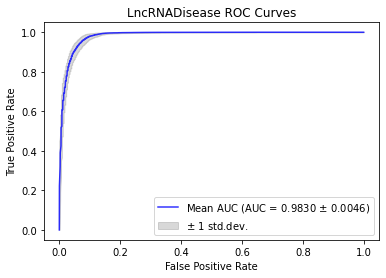

In [2]:
statistic_total_AUC(args, total_KFOLD_test_labels, total_FOLD_test_scores, KFOLD_test_out_come)